---

# Experiments and visualisations

Supplementarty notebook for the paper "pointwise deep learning for leaf-wood segmentation of tropical tree point clouds from terrestrial laser scanning"


August 2023 \
Wouter Van den Broeck

---

## Overview data

/tmp/ipykernel_6674/456353210.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


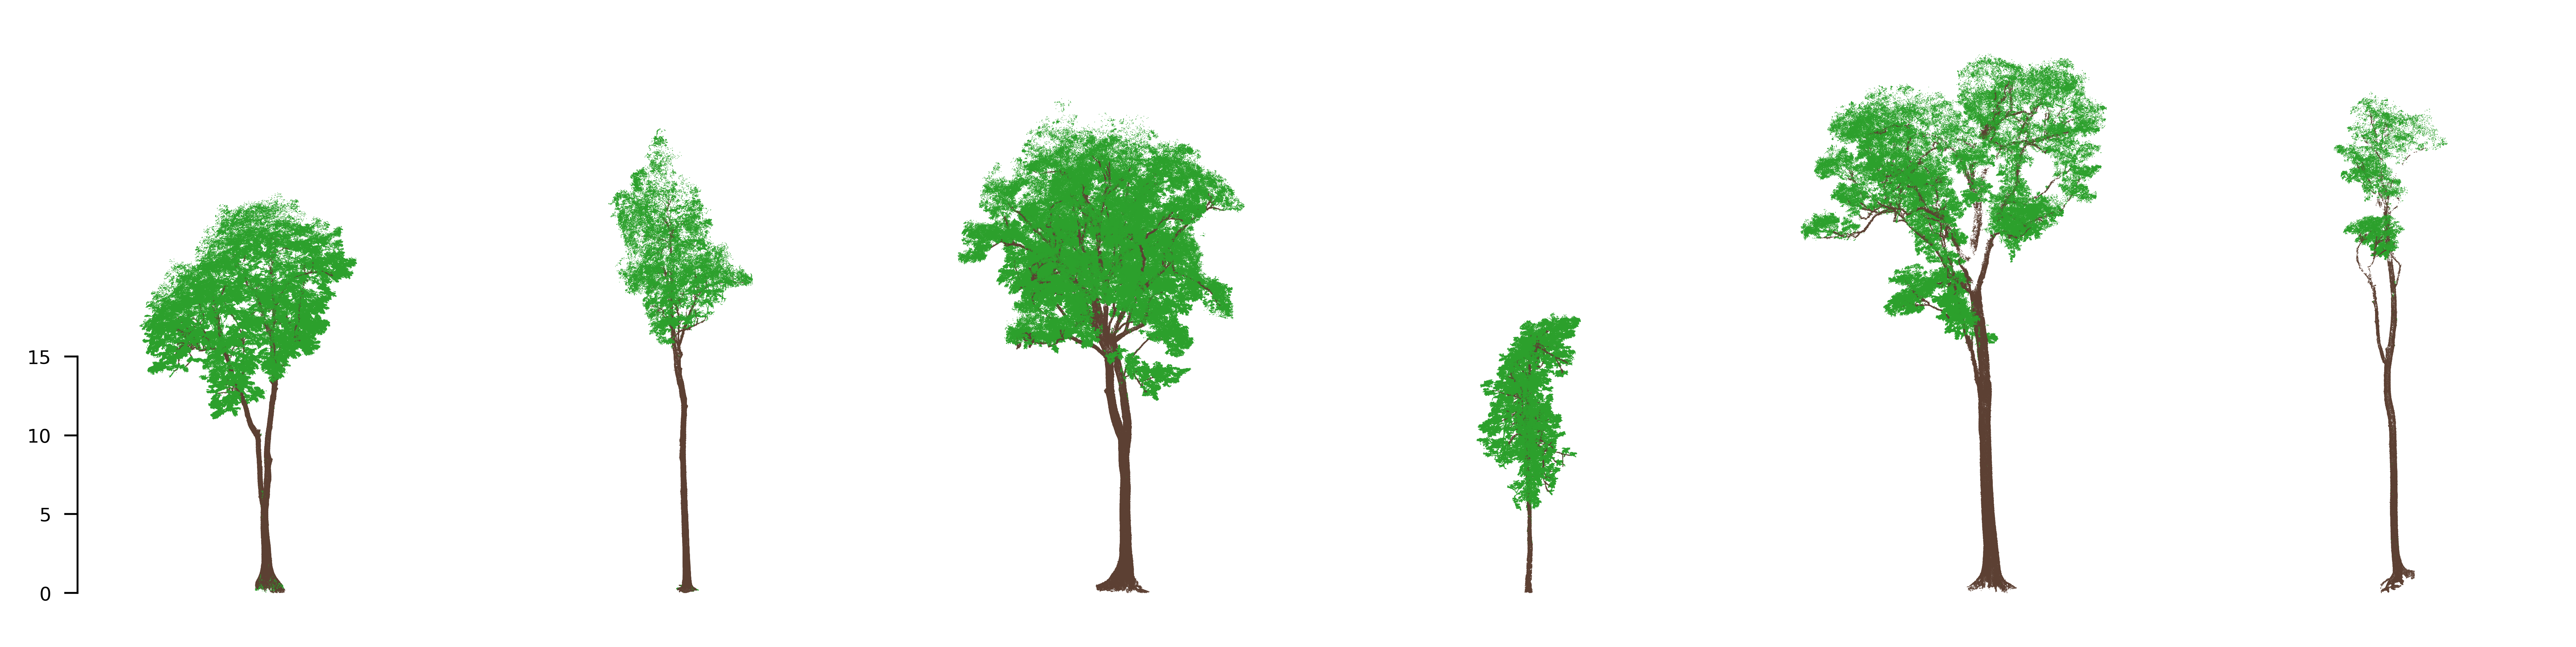

In [44]:
import numpy as np
import matplotlib.pyplot as plt

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/train/'

filenames = [
    # 'oc_017_pc.npy',
    # 'dro_084_pc.npy',
    # 'rc_193_pc.npy',
    # 'dro_067_pc.npy',

    'rc_154_pc.npy',
    'rc_193_pc.npy',
    'dro_084_pc.npy',
    # 'dro_067_pc.npy',
    'dro_051_pc.npy',
    'oc_030_pc.npy',
    'oc_017_pc.npy',
]

pcds = [np.load(path + filename) for filename in filenames]


def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 0:
            cols.append('#2ca02c')
        elif l == 1:
            cols.append('#5C4033')
    return cols

# Create a figure
fig, axs = plt.subplots(1, len(pcds), figsize=(12, 4), dpi=500, sharey=True, sharex=True, layout='compressed')

for i, pcl in enumerate(pcds):

    # Recenter and rebase
    pcl[:, 2] -= np.min(pcl[:, 2])
    pcl[:, 0] -= np.mean(pcl[:, 0])
    pcl[:, 1] -= np.mean(pcl[:, 1])

    # Get predictions as colors
    cols = pltcolor(pcl[:, 3])

    # Plot trees projected along x axis
    ax = axs[i]
    ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.1, marker='.', edgecolor=None, linewidth=0)

    # Set equal aspect ratio for x and y axis
    ax.set_aspect(1)

    # Remove all borders except the left y-axis for the very first subplot
    if i == 0:
        ax.yaxis.set_visible(True)
        ax.set_yticks([0, 10, 20, 30])
        ax.set_yticklabels(['0', '10', '20', '30 m']) #, fontsize=5)
        ax.tick_params(width=1)
        ax.spines['left'].set_bounds(0, 30)
        # ax.spines['left'].set_linewidth(0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    # Remove x-axis labels for all subplots
    ax.set_xticks([])


# Save figure
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/trees_train_example.png'
fig.savefig(figname, bbox_inches='tight')

plt.tight_layout()   
plt.show()

/tmp/ipykernel_6674/2883236245.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


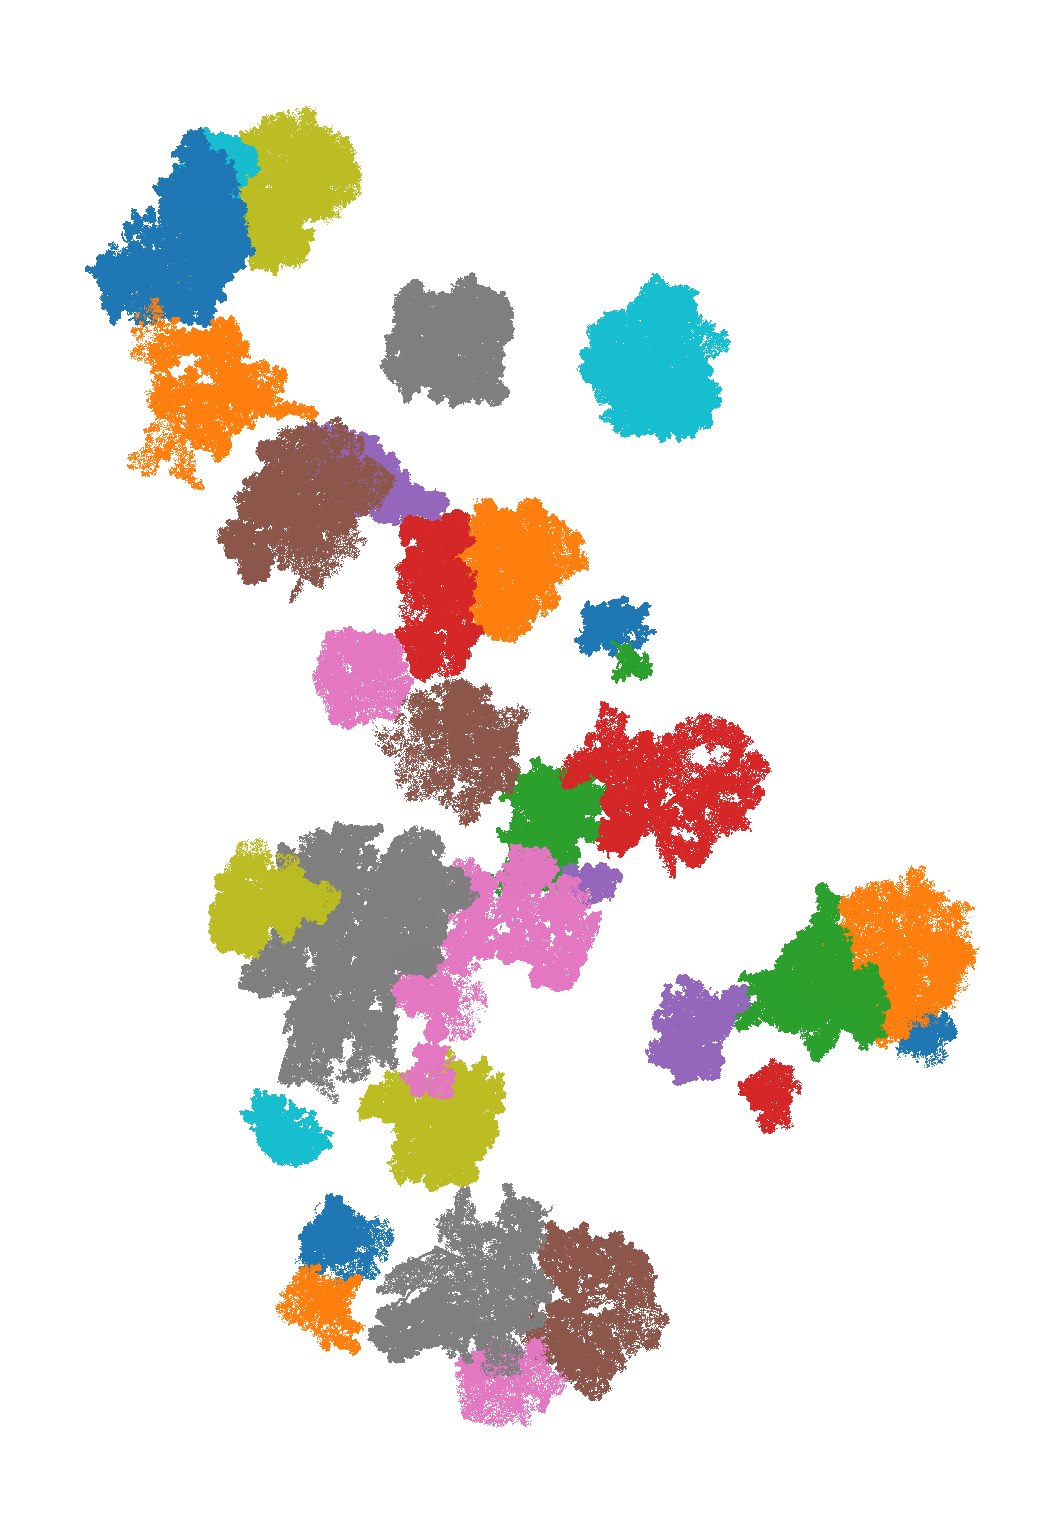

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed/'

toi = [
    'rc_154_pc.txt',
    'rc_193_pc.txt',
    'dro_084_pc.txt',
    'dro_051_pc.txt',
    'oc_030_pc.txt',
    'oc_017_pc.txt',
]

# Reading all pointclouds
plotname = 'dr'
filenames = [f for f in os.listdir(path) if f[:2] == plotname]
pcds = [np.loadtxt(path + filename) for filename in filenames]

# Get minimum x value of all trees
x_min_all = min([np.min(pcl[:, 0]) for pcl in pcds])

# Create a figure
fig, axs = plt.subplots(1, 1, figsize=(5, 5), dpi=400, layout='compressed')
ax = axs

ax.set_aspect(1)
# ax.xaxis.set_visible(False)
ax.set_xticks([0, 20])
ax.set_xticklabels(['0', '20 m']) #, fontsize=5)
# ax.tick_params(width=1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(0, 20)
# ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)

# Loop over pointclouds
for name, pcl in zip(filenames, pcds):
    ax.scatter(pcl[:, 0] - x_min_all, pcl[:, 1], s=0.1, marker='.', edgecolor=None, linewidth=0)
    if name in toi:
        x_min, x_max, y_min, y_max = np.min(pcl[:, 0]), np.max(pcl[:, 0]), np.min(pcl[:, 1]), np.max(pcl[:, 1])
        rect = patches.Rectangle((x_min - x_min_all, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='k', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)


# Save figure
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/' + plotname + '_top_view.png'
fig.savefig(figname, bbox_inches='tight', transparent=True)

plt.tight_layout()   
plt.show()


## Evaluating leaf wood segmentation results

In [5]:
# Load packages
import numpy as np
import pandas as pd
import os

In [10]:
# Process GBSeparation files into correct format

data_path =  '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_gbseparation/'

filenames_wood = [filename for filename in os.listdir(data_path) if len(filename.split('wood')) == 2]
filenames_leaf = [filename for filename in os.listdir(data_path) if len(filename.split('leaf')) == 2]

for file_wood, file_leaf in zip(filenames_wood, filenames_leaf):
    # Read woody and leaf points
    wood = np.loadtxt(data_path + file_wood)
    leaf = np.loadtxt(data_path + file_leaf)

    # Add label column
    wood = np.hstack((wood, np.ones(shape=(wood.shape[0], 1))))
    leaf = np.hstack((leaf, np.zeros(shape=(leaf.shape[0], 1))))

    # Stack together    
    combo = np.vstack((wood, leaf))

    # Save to file
    path_out = data_path + file_wood.split('wood')[0] + file_wood.split('wood')[1]
    np.savetxt(path_out, combo, fmt='%.3f')


In [6]:
def get_iou(confusion_matrix):
    ious = []
    for label in range(len(confusion_matrix)):
        tp = np.longlong(confusion_matrix[label, label])
        fn = np.longlong(confusion_matrix[label, :].sum()) - tp
        fp = np.longlong(confusion_matrix[:, label].sum()) - tp

        if tp + fp + fn == 0:
            iou = float('nan')
        else:
            iou = (tp) / (tp + fp + fn)

        ious.append(iou)

    ious.append(np.nanmean(ious))
    return ious


def evaluate_prediction(path_true, path_pred):

    filenames = os.listdir(path_pred)
    print('running evaluation on', len(filenames), 'files for', path_pred)

    # Loop over ground truth and predictions and keep track of metrics
    TP, FP, TN, FN = 0, 0, 0, 0
    cm = 0
    iou_leaf_treewise, iou_wood_treewise, iou_avg_treewise, accuracy_treewise = [], [], [], []

    for filename in filenames:
        # Load ground truth and prediction
        gt = np.loadtxt(os.path.join(path_true, filename))
        try:
            pred = np.loadtxt(os.path.join(path_pred, filename))
        except:
            raise Warning(f'No ground truth file found with name {filename}')

        if len(gt) != len(pred):
            raise Exception(f'Length of prediction file and ground truth file ({filename}) do not match!')

        gt = gt[gt[:, 0].argsort()]
        gt = gt[gt[:, 1].argsort(kind='mergesort')]
        gt = gt[gt[:, 2].argsort(kind='mergesort')]
        pred = pred[pred[:, 0].argsort()]
        pred = pred[pred[:, 1].argsort(kind='mergesort')]
        pred = pred[pred[:, 2].argsort(kind='mergesort')]

        # get label
        gt = gt[:, 3].flatten().astype(np.uint16)
        pred = pred[:, 3].flatten().astype(np.uint16)

        TP += ((gt == 1) & (pred == 1)).sum()
        TN += ((gt == 0) & (pred == 0)).sum()
        FP += ((gt == 0) & (pred == 1)).sum()
        FN += ((gt == 1) & (pred == 0)).sum()

        C = len(np.unique(gt))
        y = np.bincount(C * gt + pred, minlength=C * C)

        if len(y) < C * C:
            y = np.concatenate([y, np.zeros((C * C - len(y)), dtype=np.long)])
        else:
            if len(y) > C * C:
                warnings.warn(
                    "Prediction has fewer classes than ground truth. This may affect accuracy."
                )
            y = y[-(C * C):]  # last c*c elements.

        y = y.reshape(C, C)
        cm += y
        iou_leaf_treewise.append(get_iou(y)[0])
        iou_wood_treewise.append(get_iou(y)[1])
        iou_avg_treewise.append(get_iou(y)[2])
        accuracy_treewise.append((((gt == 1) & (pred == 1)).sum() + ((gt == 0) & (pred == 0)).sum()) / len(gt))
        

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    # precision = TP / (TP + FP)
    # recall = TP / (TP + FN)
    # iou = TP / (TP + FN + FP)
    # f1 = (2 * TP) / (2 * TP + FP + FN)

    # print(
    #     'TP:', TP, 'TN:', TN, 'FP:', FP, 'FN:', FN, '\n'
    #     'accuracy:', accuracy, '\n',
    #     'precision:', precision, '\n',
    #     'recall:', recall, '\n',
    #     'iou:', iou, '\n',
    #     'f1:', f1, '\n',
    # )
    # np.concatenate((get_iou(cm), accuracy))
    metrics_treewise = [np.mean(iou_leaf_treewise), np.mean(iou_wood_treewise), np.mean(iou_avg_treewise), np.mean(accuracy_treewise)]
    metrics = get_iou(cm) + [accuracy] + metrics_treewise
    df = pd.DataFrame(np.array(metrics).reshape(1, 8), columns=['iou_leaf', 'iou_wood', 'iou_mean', 'accuracy', 'iou_leaf_treewise', 'iou_wood_treewise', 'iou_mean_treewise', 'accuracy_treewise'])
    return df



### Compare different algorithms

In [ ]:
# Specify data paths
data_path =  '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/'
dir_true = 'preprocessed/'
dir_pred = [
    'preprocessed_open3d/test_pred_LeWOS/',
    'preprocessed_open3d/test_pred_gbseparation/',
    'preprocessed_open3d/test_pred_kpconv/',
    'preprocessed_open3d/test_pred_randlanet/',
    'preprocessed_open3d/test_pred_pointTransformer/',
]

# Initialize empty dataframe
df_result = pd.DataFrame()

# Loop over folders and store prediction metrics in dataframe 
for dir in dir_pred:
    path_true = os.path.join(data_path, dir_true)
    path_pred = os.path.join(data_path, dir)

    # Get name of algorithm out of directory
    index = dir.split('_')[-1][:-1]

    # Calculate metrics
    metrics = evaluate_prediction(path_true, path_pred)

    # Concatenate to dataframe
    metrics['algorithm'] = index
    df_result = pd.concat([df_result, metrics])

# Save dataframe to file
df_result = df_result.set_index('algorithm')
path_result = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/benchmark_metrics_2.csv'
df_result.to_csv(path_result)

print(df_result)


### Save prediction results with error column

In [ ]:
# Specify data paths
data_path =  '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/'
dir_true = 'preprocessed/'
dir_pred = [
    'preprocessed_open3d/test_pred_LeWOS/',
    'preprocessed_open3d/test_pred_gbseparation/',
    'preprocessed_open3d/test_pred_kpconv/',
    'preprocessed_open3d/test_pred_randlanet/',
    'preprocessed_open3d/test_pred_pointTransformer/',
]
dir_out = 'preprocessed_open3d/test_pred_all/'
path_true = os.path.join(data_path, dir_true)

# Get names of predicted point clouds
filenames = os.listdir(os.path.join(data_path, dir_pred[0]))

# Loop over all files
for filename in filenames:
    # Load ground truth, sort, and get labels
    gt = np.loadtxt(os.path.join(path_true, filename))
    gt = gt[gt[:, 0].argsort()]
    gt = gt[gt[:, 1].argsort(kind='mergesort')]
    gt = gt[gt[:, 2].argsort(kind='mergesort')]
    gt_labels = gt[:, 3].flatten().astype(np.uint16)

    # Pre-allocate matrix holding the prediction confusion
    label_eval = np.zeros((len(gt), len(dir_pred)), dtype=np.uint8)

    # Loop over predictions from different algorithms
    for i, dir in enumerate(dir_pred):
        path_pred = os.path.join(data_path, dir)
        pred = np.loadtxt(os.path.join(path_pred, filename))
        pred = pred[pred[:, 0].argsort()]
        pred = pred[pred[:, 1].argsort(kind='mergesort')]
        pred = pred[pred[:, 2].argsort(kind='mergesort')]
        pred_labels = pred[:, 3].flatten().astype(np.uint16)

        label_eval[((gt_labels == 0) & (pred_labels == 0)), i] = 0
        label_eval[((gt_labels == 1) & (pred_labels == 1)), i] = 1
        label_eval[((gt_labels == 1) & (pred_labels == 0)), i] = 2
        label_eval[((gt_labels == 0) & (pred_labels == 1)), i] = 3
    
    # Save file
    pcl_out = np.hstack((gt, label_eval))
    path_out = os.path.join(data_path, dir_out, filename)
    np.savetxt(path_out, pcl_out, fmt='%.3f')
    



### Figures leaf wood results

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d


path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_all/'
filenames = [
    # 'rc_168_pc.txt',
    # 'rc_206_pc.txt',
    # 'dro_039_pc.txt',
    'rc_157_pc.txt',
    # 'oc_016_pc.txt',
    # 'dro_060_pc.txt',
    # 'rc_199_pc.txt',
    'dro_040_pc.txt',
]

############
# 3D plot
############

# fig = plt.figure(figsize=(8, 8))

# c = 1
# for i, filename in enumerate(filenames):
#     pcl = np.loadtxt(path + filename)
#     pcl[:, 2] -= np.min(pcl[:, 2])
#     pcl[:, 0] -= np.mean(pcl[:, 0])
#     pcl[:, 1] -= np.mean(pcl[:, 1])
#     for j in range(pcl.shape[1]-3):
#         ax = fig.add_subplot(4, 5, c, projection='3d')
#         ax.scatter(pcl[:, 0], pcl[:, 1], pcl[:, 2], c=pcl[:, 3], s = 0.1)
#         ax.axis('off')
#         c += 1

# plt.show()

####################
# 2D projected plot
####################

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 0:
            cols.append('#d2f0d0') #2ca02c
        elif l == 1:
            cols.append('#fce7d5') #5C4033
        elif l == 2:
            cols.append('red')
        elif l == 3:
            cols.append('red')
    return cols

titles = ['LeWoS', 'GBS', 'KPConv', 'RandLANet', 'PointTransformer']

# Create a figure
fig, axs = plt.subplots(2, 5, figsize=(20, 8), dpi=1000, sharey=True, sharex=True, layout='compressed')

for i, filename in enumerate(filenames):
    # Read point cloud
    pcl = np.loadtxt(path + filename)

    # Recenter and rebase
    pcl[:, 2] -= np.min(pcl[:, 2])
    pcl[:, 0] -= np.mean(pcl[:, 0])
    pcl[:, 1] -= np.mean(pcl[:, 1])

    # Loop over predictions
    for j, title in zip(range(pcl.shape[1]-4), titles):
        # Get predictions as colors
        cols = pltcolor(pcl[:, j+4])

        # Plot trees projected along x axis
        ax = axs[i, j]
        ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.2, marker='.', edgecolor=None, linewidth=0)

        # Set equal aspect ratio for x and y axis
        ax.set_aspect(1)

        # Set titles only on the top row
        if i == 0:
            ax.set_title(title, fontsize=18)

        # Remove all borders except the left y-axis for the very first subplot
        if j == 0:
            ax.yaxis.set_visible(True)
            ax.set_yticks(np.arange(0, 25, 5))
            ax.spines['left'].set_bounds(0, 20)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        else:
            ax.yaxis.set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)

        # Remove x-axis labels for all subplots
        ax.set_xticks([])


# Save figure
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/algorithm_comparison_2.png'
fig.savefig(figname, bbox_inches='tight')

# plt.tight_layout()   
plt.show()


## Ablation pointTransformer

In [7]:
# Specify data paths
data_path =  '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/'
dir_true = 'preprocessed/'
path_ablation = 'preprocessed_open3d/test_pred_pointtransformer_ablation/'

dir_pred = [path_ablation + exp for exp in os.listdir(data_path + path_ablation)]

# Initialize empty dataframe
df_result = pd.DataFrame()

# Loop over folders and store prediction metrics in dataframe 
for dir in dir_pred:
    path_true = os.path.join(data_path, dir_true)
    path_pred = os.path.join(data_path, dir)

    # Get name of algorithm out of directory
    index = dir.split('/')[-1]

    # Calculate metrics
    metrics = evaluate_prediction(path_true, path_pred)

    # Concatenate to dataframe
    metrics['algorithm'] = index
    df_result = pd.concat([df_result, metrics])

# Save dataframe to file
df_result = df_result.set_index('algorithm')
path_result = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/ablation_study.csv'
df_result.to_csv(path_result)

print(df_result)

running evaluation on 30 files for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_pointtransformer_ablation/normal
running evaluation on 30 files for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_pointtransformer_ablation/normalize
running evaluation on 30 files for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_pointtransformer_ablation/no_augmentation
running evaluation on 30 files for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_pointtransformer_ablation/num_points_131072
running evaluation on 30 files for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/test_pred_pointtransformer_ablation/num_points_32768
running evaluation on 30 files for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spa

#### Make figure ablation study

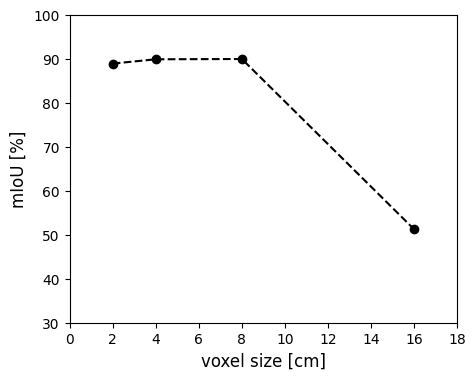

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

path_df = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/ablation_study.csv'
df = pd.read_csv(path_df)

df_vox = df[df['algorithm'].isin(['normal', 'voxel_size_004', 'voxel_size_008', 'voxel_size_016'])]
vs = np.array([2, 4, 8, 16])

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(vs, df_vox['iou_mean'] * 100, marker='o', linestyle='--', color='k')
plt.ylabel('mIoU [%]', color='black', fontsize=12)
plt.xlabel('voxel size [cm]', color='black', fontsize=12)
plt.xlim([0, 18])
plt.ylim([30, 100])
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))

# Save plot
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/ablation_voxsize.png'
fig.savefig(figname, bbox_inches='tight', dpi=300)

# Show plot
plt.show()


## Inference timings

In [1]:
import os
import time
import numpy as np
import pandas as pd
import ml3d as _ml3d
import ml3d.torch as ml3d
from pclbox.models import CustomRandLANet, CustomPointTransformer, CustomKPConv


def read_cloud(path):
    pcl = np.loadtxt(path)
    data = {
        'point': pcl[:, :3],
        'feat': None,
        'label': np.zeros((pcl.shape[0]), dtype=np.int32)
    }
    return data


def time_inference(cfg_path, ckpt_path):

    # Get config file
    cfg = _ml3d.utils.Config.load_from_file(cfg_path)

    # Get data path, test folder and prediction folder from config file
    data_path = cfg.dataset.get('dataset_path')
    test_dir = 'inference_timings'

    # Define model
    if cfg.model.name == 'RandLANet':
        model = CustomRandLANet(**cfg.model) 
    elif cfg.model.name == 'PointTransformer':
        model = CustomPointTransformer(**cfg.model)
    elif cfg.model.name == 'KPConv':
        model = CustomKPConv(**cfg.model)

    # Define pipeline
    pipeline = ml3d.pipelines.SemanticSegmentation(model, **cfg.pipeline)

    # Load models weights
    pipeline.load_ckpt(ckpt_path)

    # Store filenames of test point clouds in list
    filenames = [f for f in os.listdir(os.path.join(data_path, test_dir)) if f[-3:] == 'txt']

    # Loop over files, run inference and store timing
    timings = []
    num_points = []
    for filename in filenames:
        # Read point cloud
        data = read_cloud(os.path.join(data_path, test_dir, filename))

        # Run inference and time
        start = time.time()
        pred = pipeline.run_inference(data)
        end = time.time()

        # Append timing and number of points
        timings.append(end - start)
        num_points.append(len(data['point']))

        print(end - start, 'seconds')

    df_timings = pd.DataFrame(np.array(timings).reshape(-1, 1), columns=['time'])
    df_timings['num_points'] = np.array(num_points).reshape(-1, 1)
    df_timings = df_timings.set_index('num_points')

    return df_timings
    

# Specify path to config file and weights
# cfg_path = '../cfg/pointtransformer_leafwood.yml',
# ckpt_path = '../logs/CustomPointTransformer_TropicalLeafWood_torch/checkpoint/ckpt_best_pointtransformer.pth',

cfg_paths = [
    '../cfg/pointtransformer_leafwood.yml',
    # '../cfg/kpconv_leafwood.yml',
    # '../cfg/randlanet_leafwood.yml',
]
ckpt_paths = [
    '../logs/CustomPointTransformer_TropicalLeafWood_torch/checkpoint/ckpt_best_pointtransformer.pth',
    # '../logs/CustomKPConv_TropicalLeafWood_torch/checkpoint_2023-11-29_14:23:42/ckpt_best.pth',
    # '../logs/CustomRandLANet_TropicalLeafWood_torch/checkpoint/ckpt_best_randlanet.pth',
]

n_repeat = 3

# Give name to inference run
inference_names = ['pointtransformer_65536']

for inference_name, cfg_path, ckpt_path in zip(inference_names, cfg_paths, ckpt_paths):
    for i in range(n_repeat):
        # Run inference timing
        df_timings = time_inference(cfg_path, ckpt_path)

        # Change column name
        name = inference_name + '_' + str(i)
        df_timings = df_timings.rename(columns={'time': name})

        # Check if a timings file already exists -> if yes, concatenate new timings to it
        file_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/inference_timings/timings.csv'
        if os.path.isfile(file_out):
            df = pd.read_csv(file_out)
            df_timings = pd.concat([df.set_index('num_points'), df_timings[name]], axis=1)

        # Save dataframe with timings
        df_timings.to_csv(file_out)

        print(df_timings)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


test 0/1: 100%|█████████▉| 245602/245795 [00:18<00:00, 10292.20it/s]

33.121588468551636 seconds


test 0/1: 100%|██████████| 245795/245795 [00:44<00:00, 5559.67it/s] 


314.941237449646 seconds


test 0/1: 100%|█████████▉| 476144/476184 [01:00<00:00, 4259.48it/s] 

80.2018551826477 seconds


test 0/1: 100%|██████████| 476184/476184 [01:15<00:00, 6335.77it/s]


8.99437952041626 seconds


test 0/1: 100%|██████████| 48616/48616 [00:00<00:00, 296378.64it/s]


3.7755353450775146 seconds
                  pt_1  pt_131072_points  pt_32768_points   randlanet  \
num_points                                                              
248832       27.133590         25.746958        32.753258   22.048223   
1011630     283.409502        227.508167       599.898016  260.189197   
482058       77.851277         64.031878       135.864682   55.962265   
106525       13.289080          5.789922         9.803155    3.422694   
49689         5.710931          7.565237         2.085313    1.161067   

            randlanet.1  pointtransformer_32768_0  pointtransformer_32768_1  \
num_points                                                                    
248832        19.405526                 32.624921                 32.155640   
1011630      228.612347                502.321808                508.544325   
482058        57.542553                126.171708                110.830142   
106525         3.807523                  9.076242                 

test 0/1: 100%|██████████| 245795/245795 [00:23<00:00, 6986.89it/s] 

30.8983314037323 seconds


test 0/1: 100%|██████████| 245795/245795 [00:42<00:00, 5838.48it/s]


309.19563937187195 seconds


test 0/1: 100%|█████████▉| 476148/476184 [01:08<00:00, 3249.90it/s] 

87.90589570999146 seconds


test 0/1: 100%|██████████| 476184/476184 [01:22<00:00, 5753.34it/s]


9.068485260009766 seconds


test 0/1: 100%|██████████| 48616/48616 [00:00<00:00, 280190.07it/s]


3.839726209640503 seconds
                  pt_1  pt_131072_points  pt_32768_points   randlanet  \
num_points                                                              
248832       27.133590         25.746958        32.753258   22.048223   
1011630     283.409502        227.508167       599.898016  260.189197   
482058       77.851277         64.031878       135.864682   55.962265   
106525       13.289080          5.789922         9.803155    3.422694   
49689         5.710931          7.565237         2.085313    1.161067   

            randlanet.1  pointtransformer_32768_0  pointtransformer_32768_1  \
num_points                                                                    
248832        19.405526                 32.624921                 32.155640   
1011630      228.612347                502.321808                508.544325   
482058        57.542553                126.171708                110.830142   
106525         3.807523                  9.076242                  

test 0/1: 100%|█████████▉| 245605/245795 [00:17<00:00, 10721.72it/s]

30.683144330978394 seconds


test 0/1: 100%|██████████| 245795/245795 [00:42<00:00, 5718.63it/s] 


283.4719383716583 seconds


test 0/1: 100%|█████████▉| 476150/476184 [00:59<00:00, 4537.53it/s] 

79.03401184082031 seconds


test 0/1: 100%|██████████| 476184/476184 [01:14<00:00, 6429.36it/s]


8.816781044006348 seconds


test 0/1: 100%|██████████| 48616/48616 [00:00<00:00, 284572.70it/s]


3.766537666320801 seconds
                  pt_1  pt_131072_points  pt_32768_points   randlanet  \
num_points                                                              
248832       27.133590         25.746958        32.753258   22.048223   
1011630     283.409502        227.508167       599.898016  260.189197   
482058       77.851277         64.031878       135.864682   55.962265   
106525       13.289080          5.789922         9.803155    3.422694   
49689         5.710931          7.565237         2.085313    1.161067   

            randlanet.1  pointtransformer_32768_0  pointtransformer_32768_1  \
num_points                                                                    
248832        19.405526                 32.624921                 32.155640   
1011630      228.612347                502.321808                508.544325   
482058        57.542553                126.171708                110.830142   
106525         3.807523                  9.076242                  

#### Make figure for inference timings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/inference_timings/'

# Read csv files with timings
df_dl = pd.read_csv(path + 'timings.csv').sort_values('num_points')
df_gbs = pd.read_csv(path + 'timings_gbs.csv').sort_values('num_points')
df_lewos = pd.read_csv(path + 'timings_lewos.csv').sort_values('num_points')

# Get number of points in the five point clouds used for inference
num_points = df_dl['num_points']

# Drop num_points column
df_dl = df_dl.drop(columns='num_points')
df_gbs = df_gbs.drop(columns='num_points')
df_lewos = df_lewos.drop(columns='num_points')

# Process deep learning timings 
colnames = ['pointtransformer_32768', 'kpconv', 'randlanet', 'pointtransformer_131072', 'pointtransformer_65536']
df_dl_avg = df_dl.groupby(np.arange(len(df_dl.columns))//3, axis=1).mean()
df_dl_std = df_dl.groupby(np.arange(len(df_dl.columns))//3, axis=1).std()
df_dl_avg.columns = colnames
df_dl_std.columns = colnames

# Process lewos timings 
df_lewos_avg = df_lewos.mean(axis=1)
df_lewos_std = df_lewos.std(axis=1)


/tmp/ipykernel_7001/1873368151.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dl_std = df_dl.groupby(np.arange(len(df_dl.columns))//3, axis=1).std()


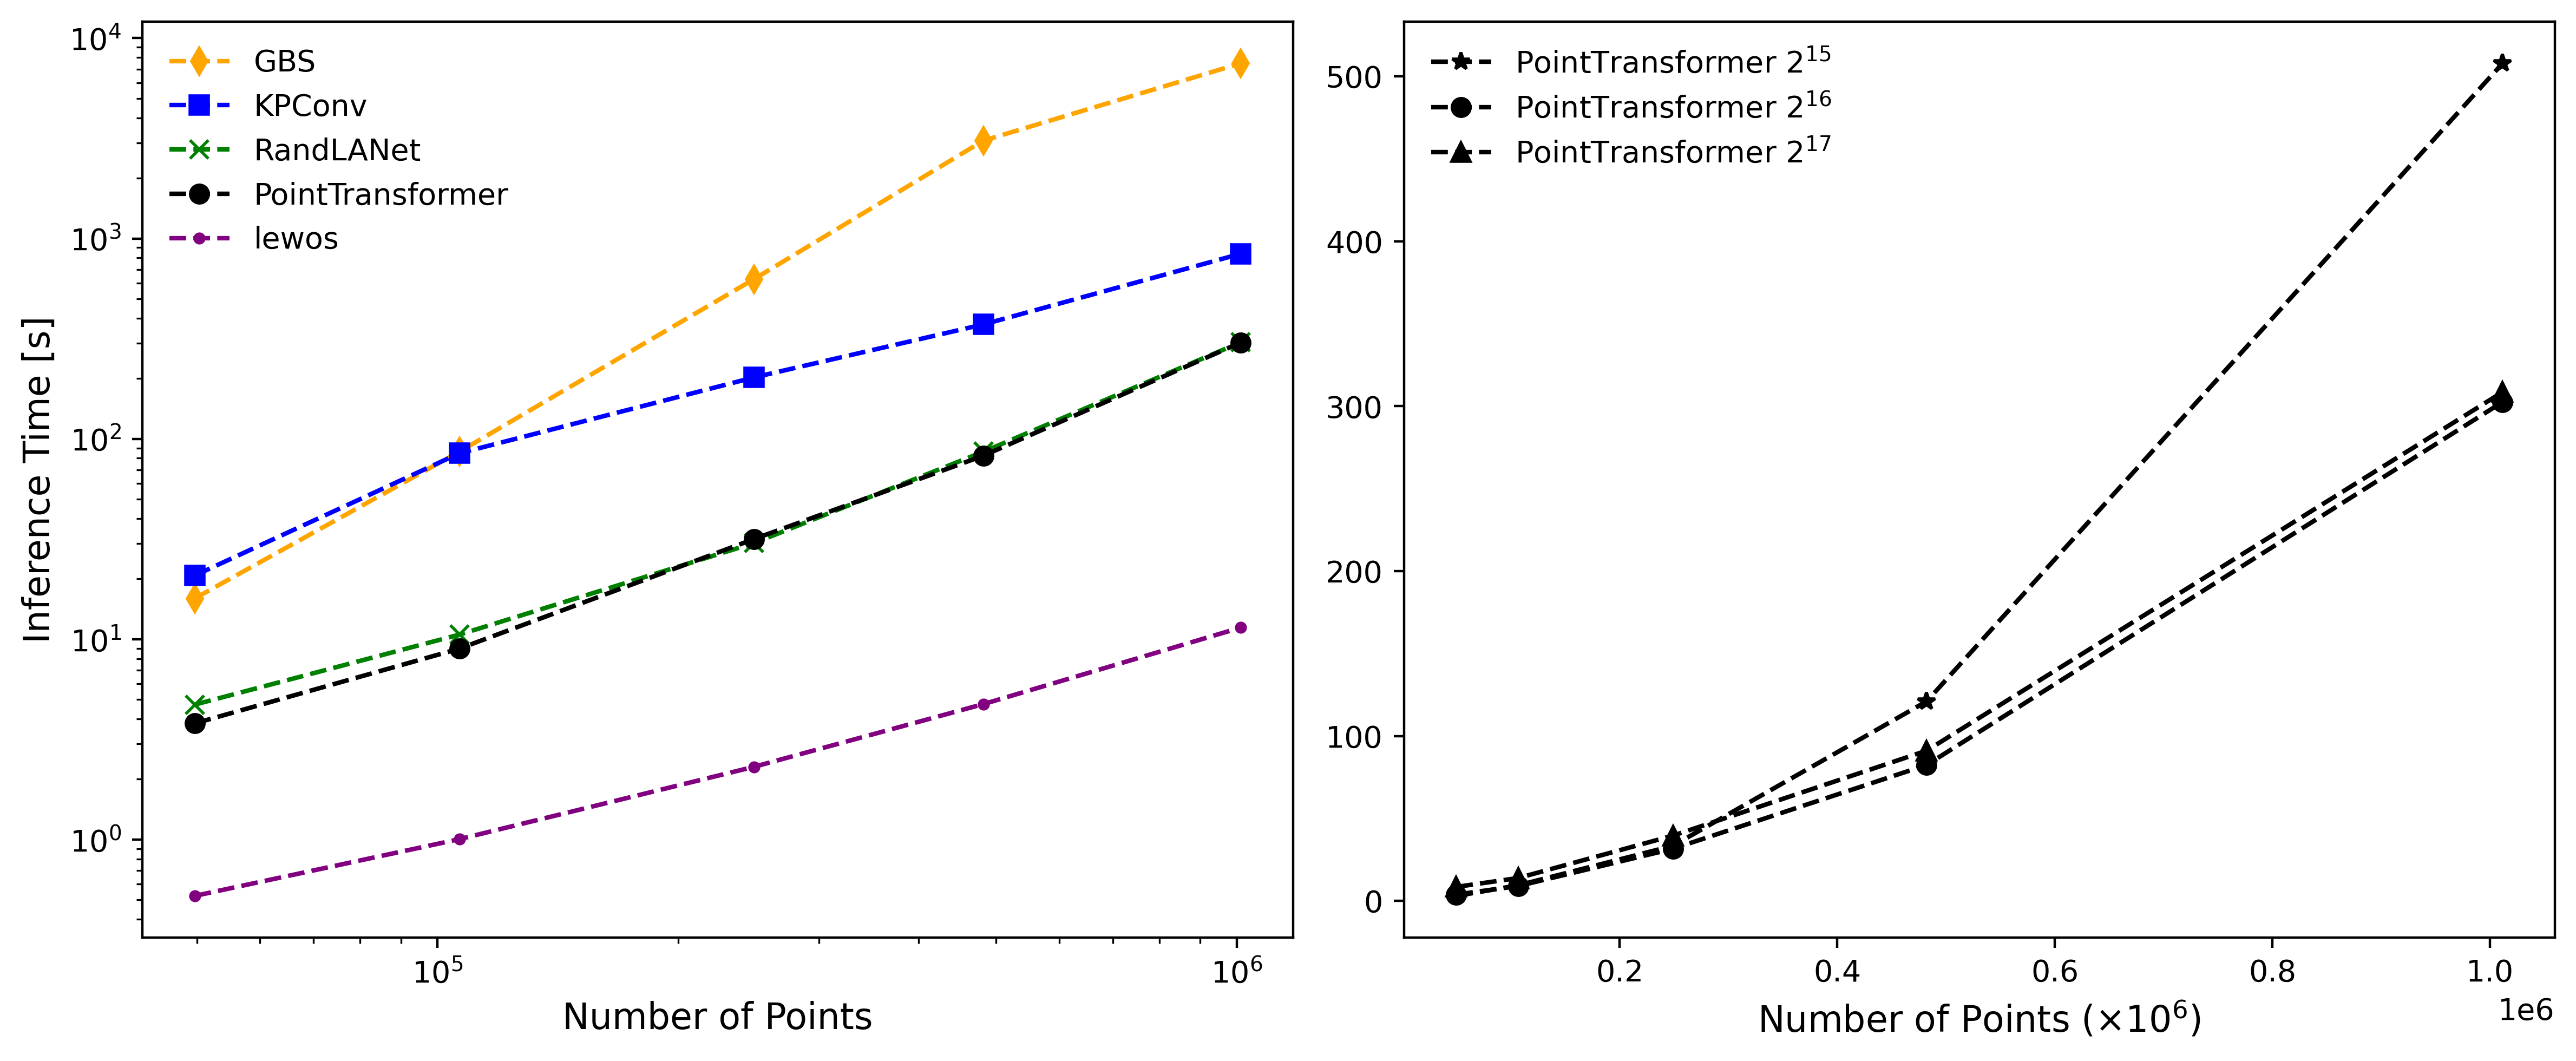

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=False, dpi=400)

# Set font to Times New Roman
plt.rcParams['font.family'] = 'sans-serif'

# Plot for the first subplot
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Number of Points', fontsize=12)
axs[0].set_ylabel('Inference Time [s]', fontsize=12)
# axs[0].set_title('Plot 1')

# Plot dashed lines with markers and colors
axs[0].plot(num_points, df_gbs, marker='d', linestyle='--', color='orange', label='GBS')
axs[0].plot(num_points, df_dl_avg['kpconv'], marker='s', linestyle='--', color='b', label='KPConv')
axs[0].plot(num_points, df_dl_avg['randlanet'], marker='x', linestyle='--', color='g', label='RandLANet')
axs[0].plot(num_points, df_dl_avg['pointtransformer_65536'], marker='o', linestyle='--', color='k', label='PointTransformer')
axs[0].plot(num_points, df_lewos_avg, marker='.', linestyle='--', color='purple', label='lewos')

# Add legend
axs[0].legend(frameon=False)

# Plot for the second subplot
# axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[1].set_xlabel(r'Number of Points ($ \times 10^6$)', fontsize=12)
# axs[1].set_title('Plot 2')

# Plot dashed lines with markers and colors
axs[1].plot(num_points, df_dl_avg['pointtransformer_32768'], marker='*', linestyle='--', color='k', label='PointTransformer $2^{15}$')
axs[1].plot(num_points, df_dl_avg['pointtransformer_65536'], marker='o', linestyle='--', color='k', label='PointTransformer $2^{16}$')
axs[1].plot(num_points, df_dl_avg['pointtransformer_131072'], marker='^', linestyle='--', color='k', label='PointTransformer $2^{17}$')

# Add legend
axs[1].legend(frameon=False)

# Save figure
figpath = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/inference_timings.png'
fig.savefig(figpath, bbox_inches='tight', dpi=300)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()



## Code for converting txt files to ply files, and ply files to npy files

In [20]:
import open3d as o3d

data_path =  '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/'
filenames = [f[:-3] + 'txt' for f in os.listdir(data_path + 'preprocessed_open3d/test') if f[-3:] == 'npy']

for filename in filenames:
    # Read file
    pcl = np.loadtxt(os.path.join(data_path, 'preprocessed', filename))
    xyz = pcl[:, :3]
    labels = pcl[:, -1].reshape(-1, 1)

    # Convert to open3d tensor format
    device = o3d.core.Device("CPU:0")
    pcd = o3d.t.geometry.PointCloud(device)
    pcd.point.positions = o3d.core.Tensor(xyz, o3d.core.float32, device)
    pcd.point.labels = o3d.core.Tensor(labels, o3d.core.int32, device)

    # Write as ply file
    file_out = os.path.join(data_path, 'preprocessed_open3d/test_ply', filename[:-3] + 'ply')
    o3d.t.io.write_point_cloud(file_out, pcd, write_ascii=False, compressed=False, print_progress=False)


In [28]:
import open3d as o3d
import numpy as np

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/'
filenames = os.listdir(path + 'Tiles/')

for filename in filenames:
    print(filename)
    pcl = o3d.t.io.read_point_cloud(path + 'Tiles/' + filename)
    xyz = pcl.point.positions.numpy()
    labels = pcl.point.labels.numpy()
    pcl = np.hstack((xyz, labels))
    with open(path + 'Tiles_npy/' + filename[:-3] + 'npy', 'wb') as f:
        np.save(f, pcl)
    


Tile_0.ply
Tile_1.ply
Tile_2.ply
Tile_3.ply


## QSM

In [2]:
# Get only woody points

import os
import numpy as np
import open3d as o3d

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/'
dirs = [
    'test_pred_gbseparation/',
    'test_pred_LeWOS/',
    'test_pred_pointtransformer/',
    'test_ply/',
]

for dir in dirs:
    
    filenames = os.listdir(path + dir)

    for filename in filenames:
        if dir == 'test_ply/':
            pcl = o3d.t.io.read_point_cloud(path + dir + filename)
            xyz = pcl.point.positions.numpy()
            labels = pcl.point.labels.numpy()
            pcl = xyz[(labels == 1).squeeze(), :]
        else:
            pcl = np.loadtxt(path + dir + filename)
            pcl = pcl[pcl[:, 3] == 1, :3]

        if not os.path.exists(os.path.join(path, 'qsm', dir)):
            os.mkdir(os.path.join(path, 'qsm', dir))
        path_out = os.path.join(path, 'qsm', dir, filename[:-3] + 'txt')
        np.savetxt(path_out, pcl, fmt='%.3f')


In [34]:
## Code for renaming files to work with 'summary_qsm_metrics' from ITSMe package
import shutil
import os

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/qsm/'

dirs = [
    'ground_truth/',
    'test_pred_gbseparation/',
    'test_pred_LeWOS/', 
    'test_pred_pointtransformer/',
]

for dir in dirs:
    
    filenames = [f for f in os.listdir(path + dir + 'opt/') if (len(f.split('ModelData')) == 1) & (f[-3:] == 'mat')]

    for filename in filenames:

        name = filename[:-6]
        number = filename[-5]
        
        path_src = path + dir + 'opt/' + filename
        if not os.path.exists(path + dir + 'opt_renamed/'):
            os.mkdir(path + dir + 'opt_renamed/')
        path_dst = path + dir + 'opt_renamed/' + name + '_qsm_' + number + '.mat'

        shutil.copyfile(path_src, path_dst)

In [16]:
# Read QSM metrics from csv files and get volumes

import pandas as pd

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/qsm/'

dirs = [
    'ground_truth/',
    'test_pred_gbseparation/',
    'test_pred_LeWOS/', 
    'test_pred_pointtransformer/',
]

csv_filename = 'qsm_metrics.csv.csv'

df_mean, df_std = [], []
for dir in dirs:
    # Read dataframe
    df = pd.read_csv(path + dir + csv_filename)

    # Calculate average volume and standard deviation for each tree 
    df['name'] = df['tree_id'].str[:9]
    df_mean.append(df.groupby('name')['tree_vol_L'].mean().reset_index().rename(columns={'tree_vol_L': 'Mean_' + dir[:-1]}))
    df_std.append(df.groupby('name')['tree_vol_L'].std().reset_index().rename(columns={'tree_vol_L': 'Std_' + dir[:-1]}))

# Concatenate average volume and stdev into one large dataframe
df_volumes = pd.concat([df_m.set_index('name') for df_m in df_mean] + [df_s.set_index('name') for df_s in df_std], axis=1).reset_index()
df_volumes


name  Mean_ground_truth  Mean_test_pred_gbseparation  \
0   dro_033_p        1209.100000                   913.100000   
1   dro_039_p        3407.500000                   309.750000   
2   dro_040_p        1155.750000                  2026.571429   
3   dro_041_p        2212.300000                  2429.900000   
4   dro_053_p        1328.900000                  1492.000000   
5   dro_055_p         206.200000                   205.600000   
6   dro_056_p        1936.500000                  1766.700000   
7   dro_060_p        1948.666667                  2381.400000   
8   dro_062_p         379.400000                   464.300000   
9   dro_070_p         887.300000                   933.400000   
10  dro_085_p        1798.500000                  1573.200000   
11  dro_090_p        1003.800000                   971.900000   
12  dro_091_p        4501.300000                  4285.800000   
13  dro_092_p        5438.700000                  3618.333333   
14  oc_000_pc        1296.500000                  1362.000000   
15  oc_003_pc        1036.900000                  1030.200000   
16  oc_011_pc         928.100000                  1008.400000   
17  oc_016_pc        6261.700000                   655.000000   
18  oc_031_pc        1779.600000                  1023.000000   
19  rc_157_pc        3096.777778                  2857.900000   
20  rc_163_pc        1215.600000                  1146.700000   
21  rc_167_pc        2300.800000                  2309.500000   
22  rc_168_pc         236.600000                   227.100000   
23  rc_171_pc         900.100000                  1247.300000   
24  rc_174_pc         113.500000                    99.890000   
25  rc_184_pc       10263.888889                   543.000000   
26  rc_189_pc         645.571429                   851.111111   
27  rc_199_pc        1780.700000                  1829.300000   
28  rc_202_pc        1259.800000                  1348.700000   
29  rc_206_pc        1419.800000                  1081.300000   

    Mean_test_pred_LeWOS  Mean_test_pred_pointtransformer  Std_ground_truth  \
0             587.833333                      1147.888889         37.734305   
1            3499.100000                      3536.500000       1529.648489   
2            1099.444444                      1189.500000        150.494186   
3            2760.900000                      2711.500000        401.199327   
4            1321.500000                      1370.200000        200.826874   
5             201.500000                       210.800000          6.390966   
6            1926.000000                      2033.100000         67.808964   
7            1709.800000                      2442.000000        644.928291   
8             382.900000                       392.100000         23.922096   
9             881.000000                       900.800000         68.595513   
10           1726.400000                      1505.800000         76.212058   
11            955.800000                      1009.900000         12.443651   
12           4138.200000                      3492.000000        134.533804   
13           4906.100000                      5244.400000        416.987357   
14           1246.200000                      1339.200000         56.521874   
15            977.500000                      1024.571429          7.549099   
16            830.700000                       903.900000         39.073862   
17           5187.500000                      6003.500000        336.540257   
18            706.800000                      1025.400000        650.856393   
19           3028.500000                      3319.571429        134.414264   
20           1014.000000                      1269.900000         51.577773   
21           1914.600000                      2289.500000        118.510009   
22            216.700000                       231.700000          1.505545   
23            904.400000                      1143.250000        126.562633   
24            100.

In [17]:
# Remove trees that visually had bad QSMs
files_bad = [
    'rc_184_pc',
    'dro_039_p',
    'dro_040_p',
    'oc_031_pc',
    'rc_189_pc',

    'oc_016_pc', # GBSeparation
    'dro_092_p',
    'dro_056_p',

    'rc_202_pc', # Lewos

    'dro_091_p', # pointtransformer
    'rc_167_pc',

    'rc_157_pc', # Ground truth
]

df_volumes_filtered = df_volumes[~df_volumes['name'].isin(files_bad)].set_index('name').reset_index()
df_volumes_filtered

name  Mean_ground_truth  Mean_test_pred_gbseparation  \
0   dro_033_p        1209.100000                       913.10   
1   dro_041_p        2212.300000                      2429.90   
2   dro_053_p        1328.900000                      1492.00   
3   dro_055_p         206.200000                       205.60   
4   dro_060_p        1948.666667                      2381.40   
5   dro_062_p         379.400000                       464.30   
6   dro_070_p         887.300000                       933.40   
7   dro_085_p        1798.500000                      1573.20   
8   dro_090_p        1003.800000                       971.90   
9   oc_000_pc        1296.500000                      1362.00   
10  oc_003_pc        1036.900000                      1030.20   
11  oc_011_pc         928.100000                      1008.40   
12  rc_163_pc        1215.600000                      1146.70   
13  rc_168_pc         236.600000                       227.10   
14  rc_171_pc         900.100000                      1247.30   
15  rc_174_pc         113.500000                        99.89   
16  rc_199_pc        1780.700000                      1829.30   
17  rc_206_pc        1419.800000                      1081.30   

    Mean_test_pred_LeWOS  Mean_test_pred_pointtransformer  Std_ground_truth  \
0             587.833333                      1147.888889         37.734305   
1            2760.900000                      2711.500000        401.199327   
2            1321.500000                      1370.200000        200.826874   
3             201.500000                       210.800000          6.390966   
4            1709.800000                      2442.000000        644.928291   
5             382.900000                       392.100000         23.922096   
6             881.000000                       900.800000         68.595513   
7            1726.400000                      1505.800000         76.212058   
8             955.800000                      1009.900000         12.443651   
9            1246.200000                      1339.200000         56.521874   
10            977.500000                      1024.571429          7.549099   
11            830.700000                       903.900000         39.073862   
12           1014.000000                      1269.900000         51.577773   
13            216.700000                       231.700000          1.505545   
14            904.400000                      1143.250000        126.562633   
15            100.000000                       111.200000          2.068279   
16           1462.300000                      1754.100000         35.093684   
17           1270.000000                      1463.600000          9.919677   

    Std_test_pred_gbseparation  Std_test_pred_LeWOS  \
0                   273.054919           267.135484   
1                   377.867246           117.175509   
2                   103.836410            99.154481   
3                     8.315982             8.872554   
4                   384.019733           468.257954   
5                    14.636712            14.270794   
6                   122.245836            64.845115   
7                    79.496750           114.673643   
8                    37.601566            29.377996   
9                    41.973537            95.795848   
10                   16.060995            14.511080   
11                   34.163658            47.445993   
12                   53.775356            37.237973   
13                    5.952590             1.418136   
14                  201.777132            50.186762   
15                    4.310568             1.122497   
16                  158.313367           234.289493   
17                  137.148784            16.626619   

    Std_test_pred_pointtransformer  
0                       170.451199  
1                       122.892229  
2                       136.821701  
3                         8.297255  
4                       199.443114  
5  

In [39]:
## Overall metrics

df_out = df_volumes_filtered.sum(axis=0)
df_out.to_csv('/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/qsm/qsm_metrics_sum.csv')

print(df_volumes.sum())
print(df_out)



name                               dro_033_pdro_039_pdro_040_pdro_041_pdro_053_pd...
Mean_ground_truth                                                       61949.854762
Mean_test_pred_gbseparation                                             41992.355873
Mean_test_pred_LeWOS                                                    46415.877778
Mean_test_pred_pointtransformer                                         55564.948413
Std_ground_truth                                                        10932.426982
Std_test_pred_gbseparation                                               5103.156032
Std_test_pred_LeWOS                                                      4769.118994
Std_test_pred_pointtransformer                                           9786.109317
dtype: object
name                               dro_033_pdro_041_pdro_053_pdro_055_pdro_060_pd...
Mean_ground_truth                                                       19901.966667
Mean_test_pred_gbseparation                        

IndexError: tuple index out of range

In [19]:
import numpy as np
from sklearn.metrics import r2_score

def ccc(x,y):
    ''' Concordance Correlation Coefficient'''
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rhoc = 2*sxy / (np.var(x) + np.var(y) + (x.mean() - y.mean())**2)
    return rhoc

def r(x,y):
    ''' Pearson Correlation Coefficient'''
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rho = sxy / (np.std(x)*np.std(y))
    return rho

x = df_volumes_filtered['Mean_ground_truth']
y = [
    df_volumes_filtered['Mean_test_pred_LeWOS'],
    df_volumes_filtered['Mean_test_pred_gbseparation'],
    df_volumes_filtered['Mean_test_pred_pointtransformer'],
]

print('Concordance Correlation Coefficient')
print('LeWoS:', ccc(x, y[0]))
print('GBS:', ccc(x, y[1]))
print('PT:', ccc(x, y[2]))

print('\nPearson Correlation Coefficient')
print('LeWoS:', r(x, y[0]))
print('GBS:', r(x, y[1]))
print('PT:', r(x, y[2]))

print('\nR2')
print('LeWoS:', r2_score(x, y[0]))
print('GBS:', r2_score(x, y[1]))
print('PT:', r2_score(x, y[2]))


Concordance Correlation Coefficient
LeWoS: 0.9315828364099832
GBS: 0.9517886117492678
PT: 0.9556286407272336

Pearson Correlation Coefficient
LeWoS: 0.9408643198513434
GBS: 0.9561452836924468
PT: 0.9689481997450972

R2
LeWoS: 0.8518263349698394
GBS: 0.894581418580914
PT: 0.8964636608616601


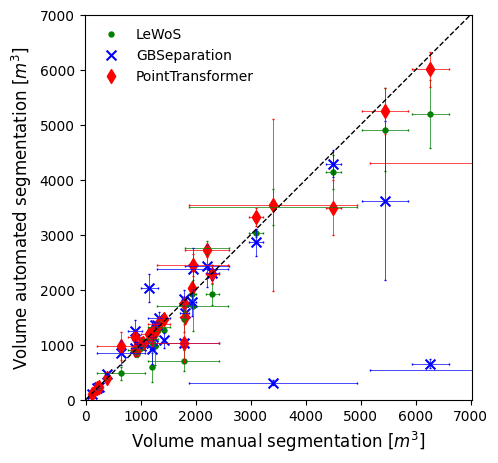

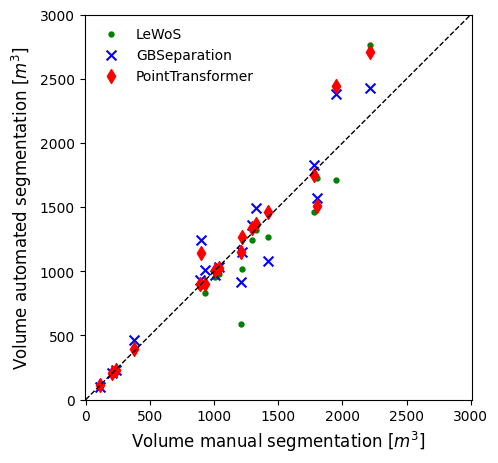

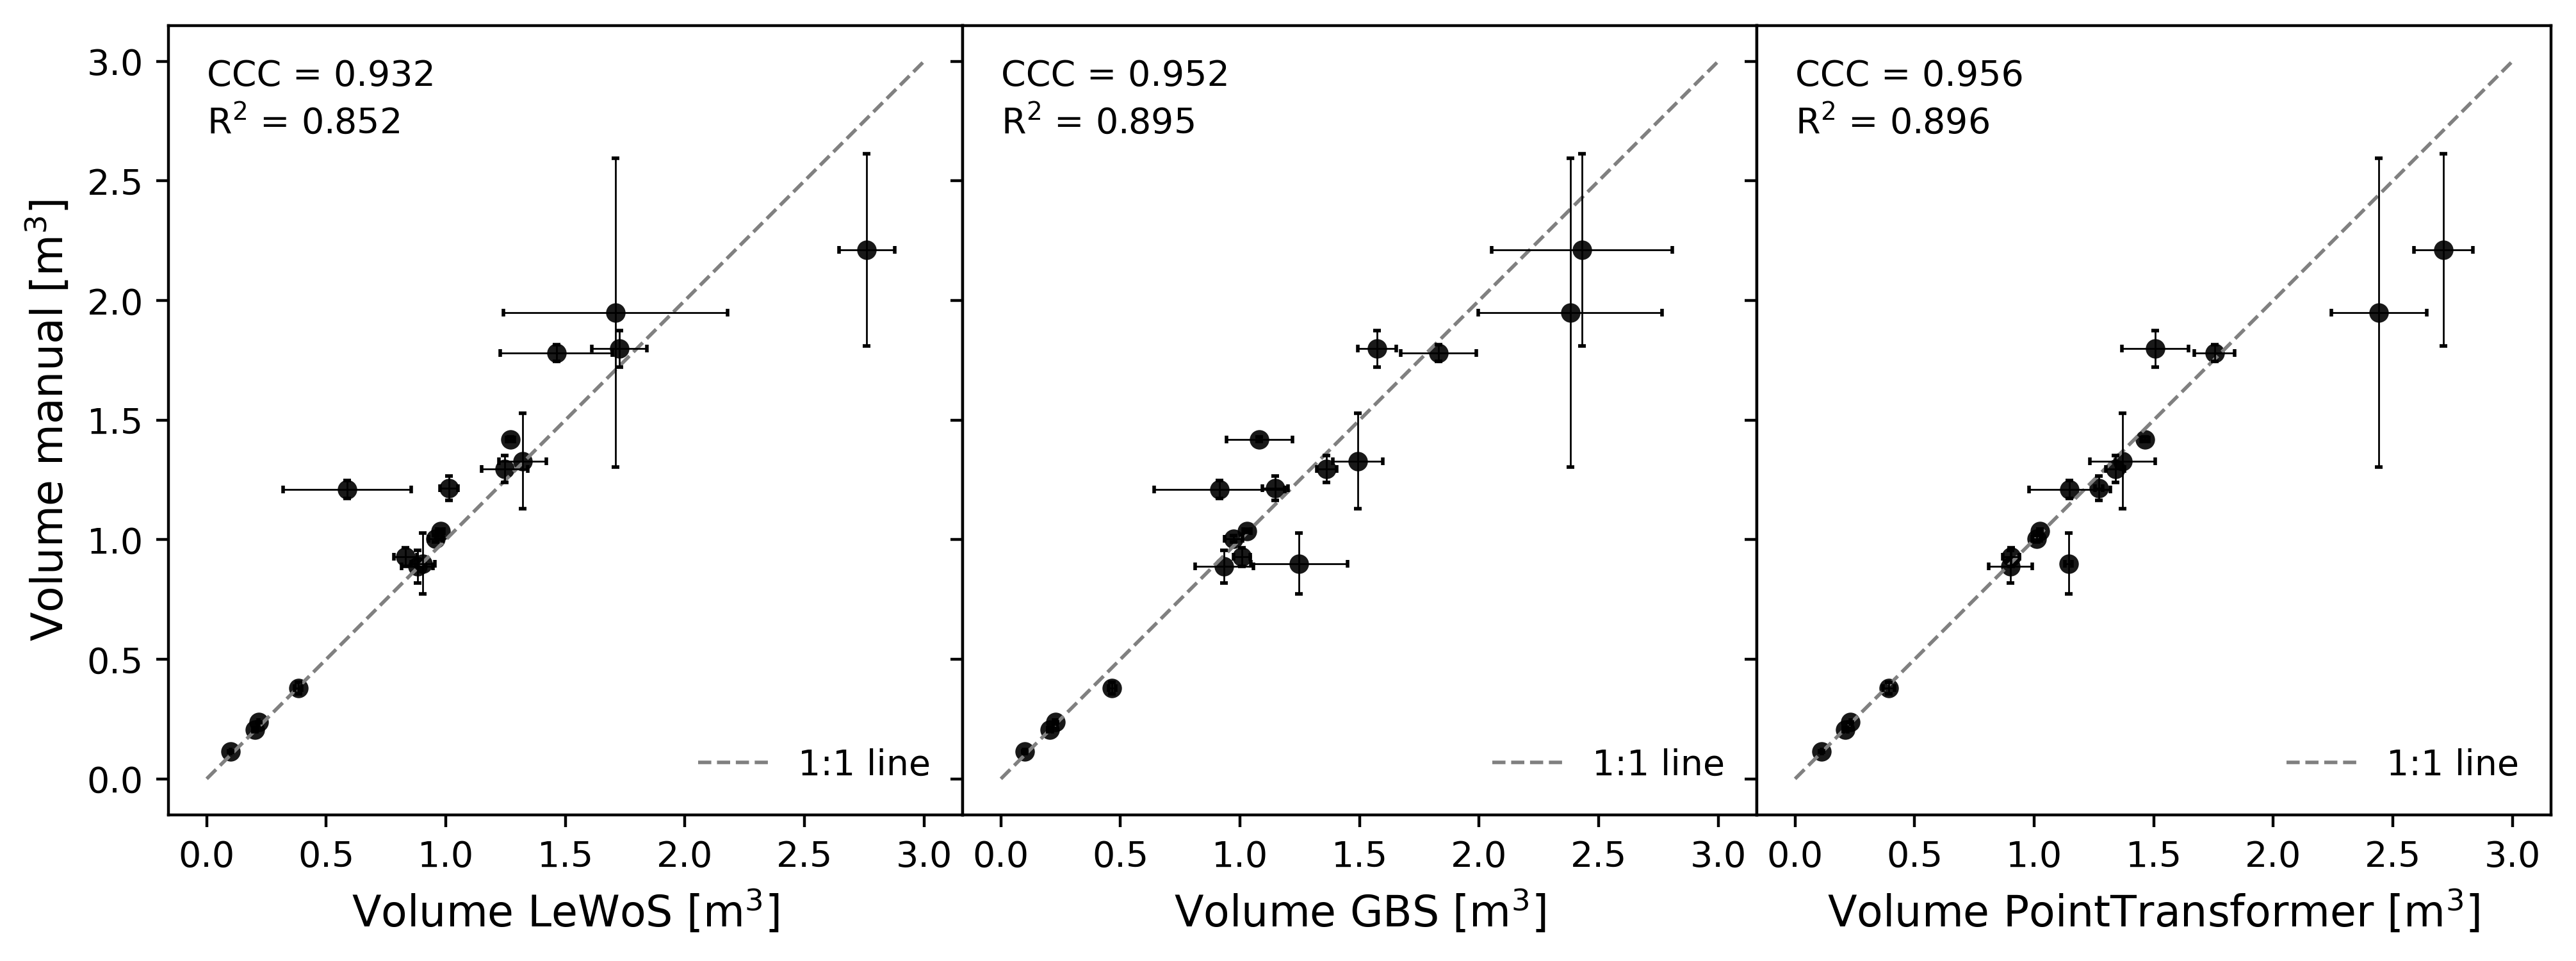

In [22]:
## Figure
import matplotlib.pyplot as plt

def plot_qsm_results(df, maxval=6000, errorbar=True):
    x_values = df['Mean_ground_truth']
    x_std = df['Std_ground_truth']
    y_values = [
        'Mean_test_pred_LeWOS',
        'Mean_test_pred_gbseparation',
        'Mean_test_pred_pointtransformer',
    ]
    y_std = [
        'Std_test_pred_LeWOS',
        'Std_test_pred_gbseparation',
        'Std_test_pred_pointtransformer',
    ]
    labels = [
        'LeWoS',
        'GBSeparation',
        'PointTransformer',
    ]
    markers = ['.', 'x', 'd']
    color = ['green', 'blue', 'red']

    fig = plt.figure(figsize=(5, 5), facecolor='white')
    plt.axis('equal')
    for m, s, col, mark, label in zip(y_values, y_std, color, markers, labels):
        plt.scatter(x_values, df[m], s=50, color=col, marker=mark, label=label) 
        if errorbar:
            plt.errorbar(x_values, df[m], xerr=x_std, yerr=df[s], fmt='none', ecolor=col, capsize=1, linewidth=0.5)
    plt.plot([0, maxval], [0, maxval], linestyle='dashed', linewidth=1, color='black')
    plt.xlabel('Volume manual segmentation [$m^3$]', color='black', fontsize=12)
    plt.ylabel('Volume automated segmentation [$m^3$]', color='black', fontsize=12)
    # plt.yscale('log')
    plt.xlim([0, maxval])
    plt.ylim([0, maxval])
    plt.legend(frameon=False)
    plt.show()

plot_qsm_results(df_volumes, 7000)
plot_qsm_results(df_volumes_filtered, 3000, errorbar=False)

df = df_volumes_filtered
x_values = df['Mean_ground_truth']
x_std = df['Std_ground_truth']
y_values = [
    'Mean_test_pred_LeWOS',
    'Mean_test_pred_gbseparation',
    'Mean_test_pred_pointtransformer',
]
y_std = [
    'Std_test_pred_LeWOS',
    'Std_test_pred_gbseparation',
    'Std_test_pred_pointtransformer',
]
labels = [
    'LeWoS',
    'GBS',
    'PointTransformer',
]
markers = ['.', 'x', 'd']
color = ['black', 'black', 'black']
maxval = 3
b = 0

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=400, sharey=True, gridspec_kw={'wspace': 0})

for i, (m, s, col, mark, label) in enumerate(zip(y_values, y_std, color, markers, labels)):
    axes[i].plot([0 - b, maxval + b], [0 - b, maxval + b], linestyle='dashed', linewidth=1, color='grey', label='1:1 line')
    axes[i].errorbar(df[m] / 1000, x_values / 1000, xerr=df[s] / 1000, yerr=x_std / 1000, fmt='none', ecolor=col, capsize=1, linewidth=0.5)
    axes[i].scatter(df[m] / 1000, x_values / 1000, color=col, alpha=0.9, edgecolor='white', linewidth=0, s=30)
    axes[i].set_ylim(0, maxval)
    axes[i].set_xlim(0, maxval)
    # axes[i].set_title('Scatterplot 1')
    axes[i].set_xlabel('Volume ' + label + ' [m$^3$]', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('Volume manual [m$^3$]', fontsize=12)
    
    axes[i].axis('equal')
    # axes[i].set_xlim([0, maxval])
    axes[i].legend(frameon=False, loc='lower right')
    axes[i].annotate("CCC = {:.3f}".format(ccc(x_values, df[m])), (0, 2.9))
    axes[i].annotate("R$^2$ = {:.3f}".format(r2_score(x_values, df[m])), (0, 2.7))

# Save figure
figpath = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/volumes_scatter.png'
fig.savefig(figpath, bbox_inches='tight', dpi=300)

# plt.tight_layout()
plt.show()


In [10]:
df = df_volumes_filtered
data1 = df['Mean_test_pred_LeWOS'] - df['Mean_ground_truth']
data2 = df['Mean_test_pred_gbseparation'] - df['Mean_ground_truth']
data3 = df['Mean_test_pred_pointtransformer'] - df['Mean_ground_truth']

print(data1.mean(), data1.std())
print(data2.mean(), data2.std())
print(data3.mean(), data3.std())

-75.14074074074074 221.03971948263393
27.50129629629629 195.48145338748174
57.24686948853615 186.67415317518459


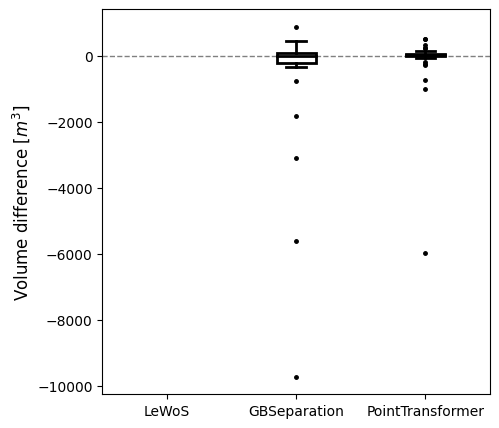

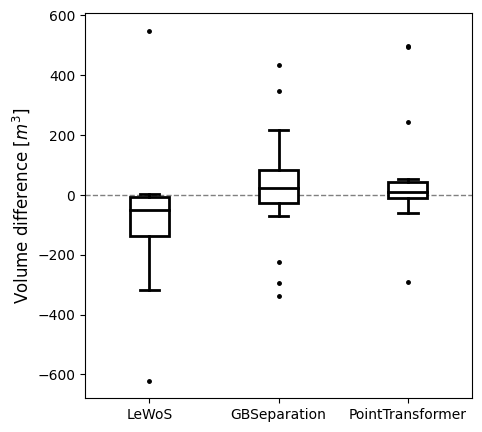

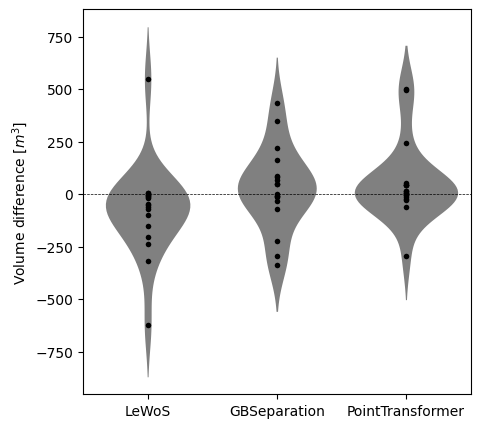

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_qsm_diff_boxplot(df):

    data1 = df['Mean_test_pred_LeWOS'] - df['Mean_ground_truth']
    data2 = df['Mean_test_pred_gbseparation'] - df['Mean_ground_truth']
    data3 = df['Mean_test_pred_pointtransformer'] - df['Mean_ground_truth']
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axhline(y=0, linestyle='--', color='gray', linewidth=1)
    
    boxprops = dict(linewidth=2, facecolor='white', color='black')
    medianprops = dict(linewidth=2, color='black')
    whiskerprops = dict(linestyle='-', linewidth=2, color='black')
    capprops = dict(linewidth=2, color='black')
    flierprops = dict(marker='.', markerfacecolor='black', markersize=5, linestyle='none', markeredgecolor='black')

    # Plot the boxplots
    # boxplot1 = ax.boxplot(data1, positions=[1], patch_artist=True, boxprops=dict(linewidth=2, facecolor='blue'), flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    # boxplot2 = ax.boxplot(data2, positions=[2], patch_artist=True, boxprops=dict(facecolor='green'), flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    # boxplot3 = ax.boxplot(data3, positions=[3], patch_artist=True, boxprops=dict(facecolor='red'), flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    ax.boxplot(
        [data1, data2, data3],
        labels=['LeWoS', 'GBSeparation', 'PointTransformer'],
        boxprops=boxprops,
        medianprops=medianprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        flierprops=flierprops,
        patch_artist=True,
    )
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_ylabel('Volume difference [$m^3$]', fontsize=12)
    plt.show()
    return fig


plot_qsm_diff_boxplot(df_volumes)
fig = plot_qsm_diff_boxplot(df_volumes_filtered)

figpath = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/volume_errors.png'
fig.savefig(figpath, bbox_inches='tight', dpi=300)


def plot_qsm_diff_dist(df, type='point'):

    data1 = df['Mean_test_pred_LeWOS'] - df['Mean_ground_truth']
    data2 = df['Mean_test_pred_gbseparation'] - df['Mean_ground_truth']
    data3 = df['Mean_test_pred_pointtransformer'] - df['Mean_ground_truth']
    df = pd.DataFrame({
        'Distribution': ['LeWoS'] * len(data1) + ['GBSeparation'] * len(data1) + ['PointTransformer'] * len(data1),
        'Values': np.concatenate([data1, data2, data3])
    })
    fig, ax = plt.subplots(figsize=(5, 5))
    if type == 'point':
        sns.violinplot(x='Distribution', y='Values', data=df, inner='point', color='grey', linewidth=0,
                        inner_kws=dict(color='black'))
        sns.stripplot(x='Distribution', y='Values', data=df, color='black', size=4, jitter=False)
    elif type == 'box':
        sns.violinplot(x='Distribution', y='Values', data=df, inner='box', color='grey', linewidth=0,
                        inner_kws=dict(box_width=15, whis_width=2, color='black'))
    ax.set_ylabel('Volume difference [$m^3$]')
    ax.set_xlabel('')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=0.5)
    plt.show()


plot_qsm_diff_dist(df_volumes_filtered, type='point')

### Figure for volume estimation

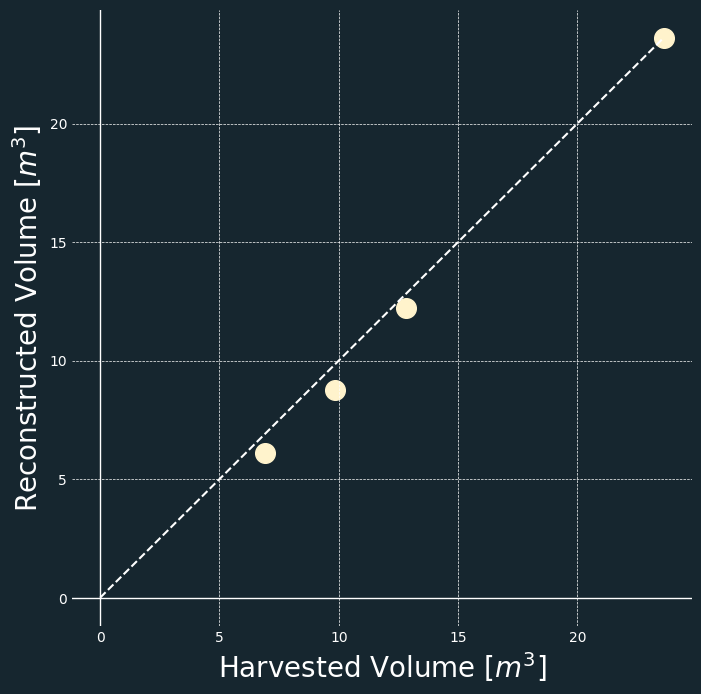

In [ ]:
import matplotlib.pyplot as plt

# Harvested data
density_weighted = np.array([567.6, 768.8703011, 638.9838694, 567])
density_core = np.array([574.6, 786.7, 655.1, 561.9])
mass = np.array([3960.1, 18584.2, 8392.6, 5521.1])
volume_harvested = mass / density_weighted

# Data
y_values = [6.10, 23.62, 12.21, 8.74]
x_values = volume_harvested

# Plot settings
fig = plt.figure(figsize=(8, 8), facecolor='#16262F')
ax = plt.axes()
ax.set_facecolor('#16262F')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.scatter(x_values, y_values, s=200, color='#FFF3CC') 
plt.plot([0, max(x_values)], [0, max(y_values)], linestyle='dashed', color='white')
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)
plt.ylabel('Reconstructed Volume [$m^3$]', color='white', fontsize=20)
plt.xlabel('Harvested Volume [$m^3$]', color='white', fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='both', which='both', length=0)
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Show plot
plt.show()

# Save plot
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/conferences-summerschools/2023_ISPRS_Geospatial_week/figures/volume_scatter.png'
fig.savefig(figname, dpi=300)



estimate AGB [3673.8, 18414.5, 8604.6, 5485.1]
relative error (%) [-0.07229615 -0.00913141  0.02526035 -0.00652044]
ME -0.015671914552053006 +- 0.035384609346172734 MAE 0.028302088753134908 +- 0.02639453080692627
estimate AGB [ 3461.7924     18162.25425258  7801.3540615   4956.714     ]
relative error (%) [-0.12583207 -0.02270454 -0.07044848 -0.10222347]
ME -0.0803021424519662 +- 0.03862673150676613 MAE 0.0803021424519662 +- 0.03862673150676613
estimate volume [6.099, 23.622, 12.209, 8.742]
volume differece [-0.87792037 -0.54878664 -0.92529087 -0.99538977]
relative error (%) [-0.12583207 -0.02270454 -0.07044848 -0.10222347]
ME -0.08030214245196624 +- 0.03862673150676615 MAE 0.08030214245196624 +- 0.03862673150676615
mass estimated: 34382.1147140888
relative error: -0.05693908842808715


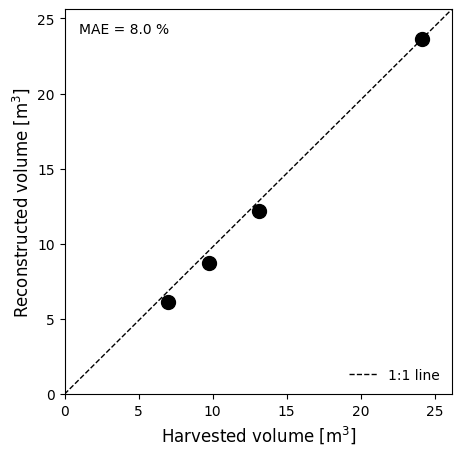

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Harvested data
density_weighted = np.array([567.6, 768.8703011, 638.9838694, 567])
# density_core = np.array([574.6, 786.7, 655.1, 561.9])
mass = np.array([3960.1, 18584.2, 8392.6, 5521.1])
volume_harvested = mass / density_weighted
mass_estimated_burt = [3673.8, 18414.5, 8604.6, 5485.1]

# TLS estimation
volume_estimated = [6.099, 23.622, 12.209, 8.742]
volume_estimated_burt = mass_estimated_burt /density_weighted
mass_estimated = volume_estimated * density_weighted

# Error burt
error = (mass_estimated_burt - mass) / mass
absolute_error = np.abs(mass_estimated_burt - mass) / mass
ME, SD_E = np.mean(error), np.std(error)
MAE, SD_AE = np.mean(absolute_error), np.std(absolute_error)
print('estimate AGB', mass_estimated_burt)
print('relative error (%)', error)
print('ME', ME, '+-', SD_E, 'MAE', MAE, '+-', SD_AE)

# Error mass
error = (mass_estimated - mass) / mass
absolute_error = np.abs(mass_estimated - mass) / mass
ME, SD_E = np.mean(error), np.std(error)
MAE, SD_AE = np.mean(absolute_error), np.std(absolute_error)
print('estimate AGB', mass_estimated)
print('relative error (%)', error)
print('ME', ME, '+-', SD_E, 'MAE', MAE, '+-', SD_AE)


# error volume
error = (volume_estimated - volume_harvested) / volume_harvested
absolute_error = np.abs(volume_estimated - volume_harvested) / volume_harvested
ME, SD_E = np.mean(error), np.std(error)
MAE, SD_AE = np.mean(absolute_error), np.std(absolute_error)
print('estimate volume', volume_estimated)
print('volume differece', volume_estimated - volume_harvested)
print('relative error (%)', error)
print('ME', ME, '+-', SD_E, 'MAE', MAE, '+-', SD_AE)


# Data
y_values = volume_estimated
x_values = volume_harvested

# Mass estimated

print('mass estimated:', sum(y_values * density_weighted))
print('relative error:', (sum(y_values * density_weighted)- sum(mass)) / sum(mass))

# Plot settings
fig = plt.figure(figsize=(5, 5), facecolor='white')
plt.scatter(x_values, y_values, s=100, color='black') 
plt.plot([0, max(x_values)+2], [0, max(y_values)+2], linestyle='dashed', linewidth=1, color='black', label='1:1 line')
plt.ylabel('Reconstructed volume [m$^3$]', color='black', fontsize=12)
plt.xlabel('Harvested volume [m$^3$]', color='black', fontsize=12)
plt.xlim([0, max(x_values)+2])
plt.ylim([0, max(y_values)+2])
plt.legend(frameon=False, loc='lower right')
plt.annotate('MAE = 8.0 %', (1, 24))

# Save plot
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/volume_validation.png'
fig.savefig(figname, bbox_inches='tight', dpi=300)

# Show plot
plt.show()

### Raycloudtools volume

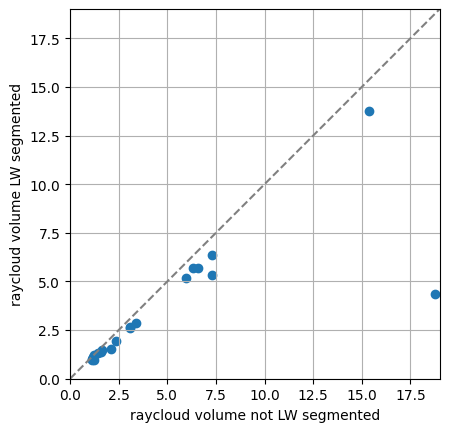

Filename   Volume_x   Volume_y
0   dro_033_pc_raycloud_trees.txt   1.459993   1.316435
1   dro_039_pc_raycloud_trees.txt   5.966330   5.188826
2   dro_040_pc_raycloud_trees.txt  15.368268  13.757601
3   dro_041_pc_raycloud_trees.txt   3.369731   2.879593
4   dro_053_pc_raycloud_trees.txt   1.626216   1.466809
5   dro_056_pc_raycloud_trees.txt   2.366565   1.963358
6   dro_060_pc_raycloud_trees.txt   3.105365   2.582505
7   dro_091_pc_raycloud_trees.txt   7.277506   5.315042
8   dro_092_pc_raycloud_trees.txt   7.289193   6.342044
9    oc_000_pc_raycloud_trees.txt   2.106550   1.519021
10   oc_003_pc_raycloud_trees.txt   1.205271   1.095888
11   oc_011_pc_raycloud_trees.txt   1.215174   0.960289
12   oc_016_pc_raycloud_trees.txt   6.578581   5.691997
13   oc_031_pc_raycloud_trees.txt   6.299975   5.681014
14   rc_157_pc_raycloud_trees.txt   3.063215   2.682692
15   rc_163_pc_raycloud_trees.txt   1.253174   1.238539
16   rc_171_pc_raycloud_trees.txt   1.151704   1.029471
17   rc_184_pc_raycloud_trees.txt  18.770201   4.363447
18   rc_202_pc_raycloud_trees.txt   1.590319   1.355815
19   rc_206_pc_raycloud_trees.txt   1.108043   0.944438

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed_open3d/raycloudtools/'

files = [
    'original/volumes_no_LWsegmentation.csv',
    'segmented_pointtransformer/volumes_LWsegmented_pointtransformer.csv',
]

df_og = pd.read_csv(path + files[0])
df_segm = pd.read_csv(path + files[1])

df_ray = pd.merge(df_og, df_segm, on='Filename', how='inner')

plt.scatter(df_ray['Volume_x'], df_ray['Volume_y'])
plt.xlabel('raycloud volume not LW segmented')
plt.ylabel('raycloud volume LW segmented')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 19], [0, 19], color='gray', linestyle='--')
plt.xlim([0, 19])
plt.ylim([0, 19])
plt.grid('True')
plt.show()

df_ray

/tmp/ipykernel_23000/1223650695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qsm['name_7'] = df_qsm['name'].str[:7]


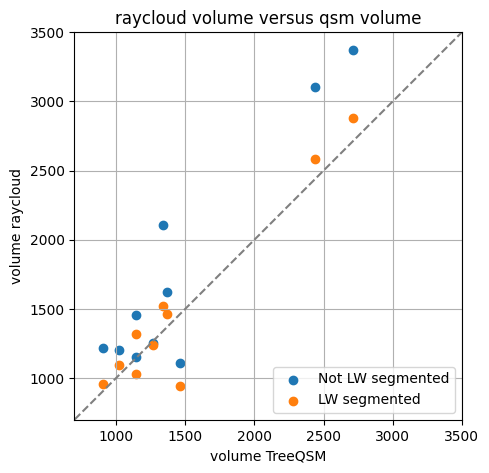

In [41]:
df_qsm = df_volumes_filtered[['name', 'Mean_test_pred_pointtransformer']]
df_qsm['name_7'] = df_qsm['name'].str[:7]
df_ray['name_7'] = df_ray['Filename'].str[:7]

df_tot = pd.merge(df_ray, df_qsm, on='name_7', how='inner')

fig = plt.figure(figsize=(5, 10))
plt.scatter(df_tot['Mean_test_pred_pointtransformer'], df_tot['Volume_x'] * 1000, label='Not LW segmented')
plt.scatter(df_tot['Mean_test_pred_pointtransformer'], df_tot['Volume_y'] * 1000, label='LW segmented')
plt.xlabel('volume TreeQSM')
plt.ylabel('volume raycloud')
plt.title('raycloud volume versus qsm volume')
plt.legend(loc='lower right')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 4000], [0, 4000], color='gray', linestyle='--')
plt.xlim([700, 3500])
plt.ylim([700, 3500])
plt.grid('True')
plt.show()

## Figure for explaining training and inference

In [7]:
import numpy as np

# Read tree point cloud
path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/preprocessed/'
filename = 'rc_195_pc.txt'
pcl = np.loadtxt(path + filename)

num_points = 65536
dist_col = np.random.rand(len(pcl), 1) * 0.001
selec_col = np.zeros((len(pcl), 1))
selec_col_2 = np.zeros((len(pcl), 1))
selec_col_3 = np.zeros((len(pcl), 1))

# First iteration
init_idx = np.argmin(dist_col)
dist = np.sum(np.square(pcl[:, :3] - pcl[init_idx, :3]), 1)
dist_normalized = 1 - dist / np.max(dist)
crop_idx = np.argsort(dist)[:num_points]
dist_col[crop_idx] = dist_normalized[crop_idx].reshape(-1, 1)
selec_col[crop_idx] = 1

# Second iteration
init_idx = np.argmin(dist_col)
dist_2 = np.sum(np.square(pcl[:, :3] - pcl[init_idx, :3]), 1)
dist_normalized_2 = 1 - dist_2 / np.max(dist_2)
crop_idx_2 = np.argsort(dist_2)[:num_points]
dist_col_2 = dist_col.copy()
dist_col_2[crop_idx_2] = dist_normalized_2[crop_idx_2].reshape(-1, 1)
selec_col_2[crop_idx_2] = 1

# Third iteration
init_idx = np.argmin(dist_col_2)
dist_3 = np.sum(np.square(pcl[:, :3] - pcl[init_idx, :3]), 1)
dist_normalized_3 = 1 - dist_3 / np.max(dist_3)
crop_idx_3 = np.argsort(dist_3)[:num_points]
dist_col_3 = dist_col_2.copy()
dist_col_3[crop_idx_3] = dist_normalized_3[crop_idx_3].reshape(-1, 1)
selec_col_3[crop_idx_3] = 1

# Save output
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_' + filename
pcl_out = np.hstack((pcl, dist_col, selec_col, dist_col_2, selec_col_2, dist_col_3, selec_col_3))
np.savetxt(path_out, pcl_out, fmt='%.3f')

/tmp/ipykernel_8293/4170520186.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


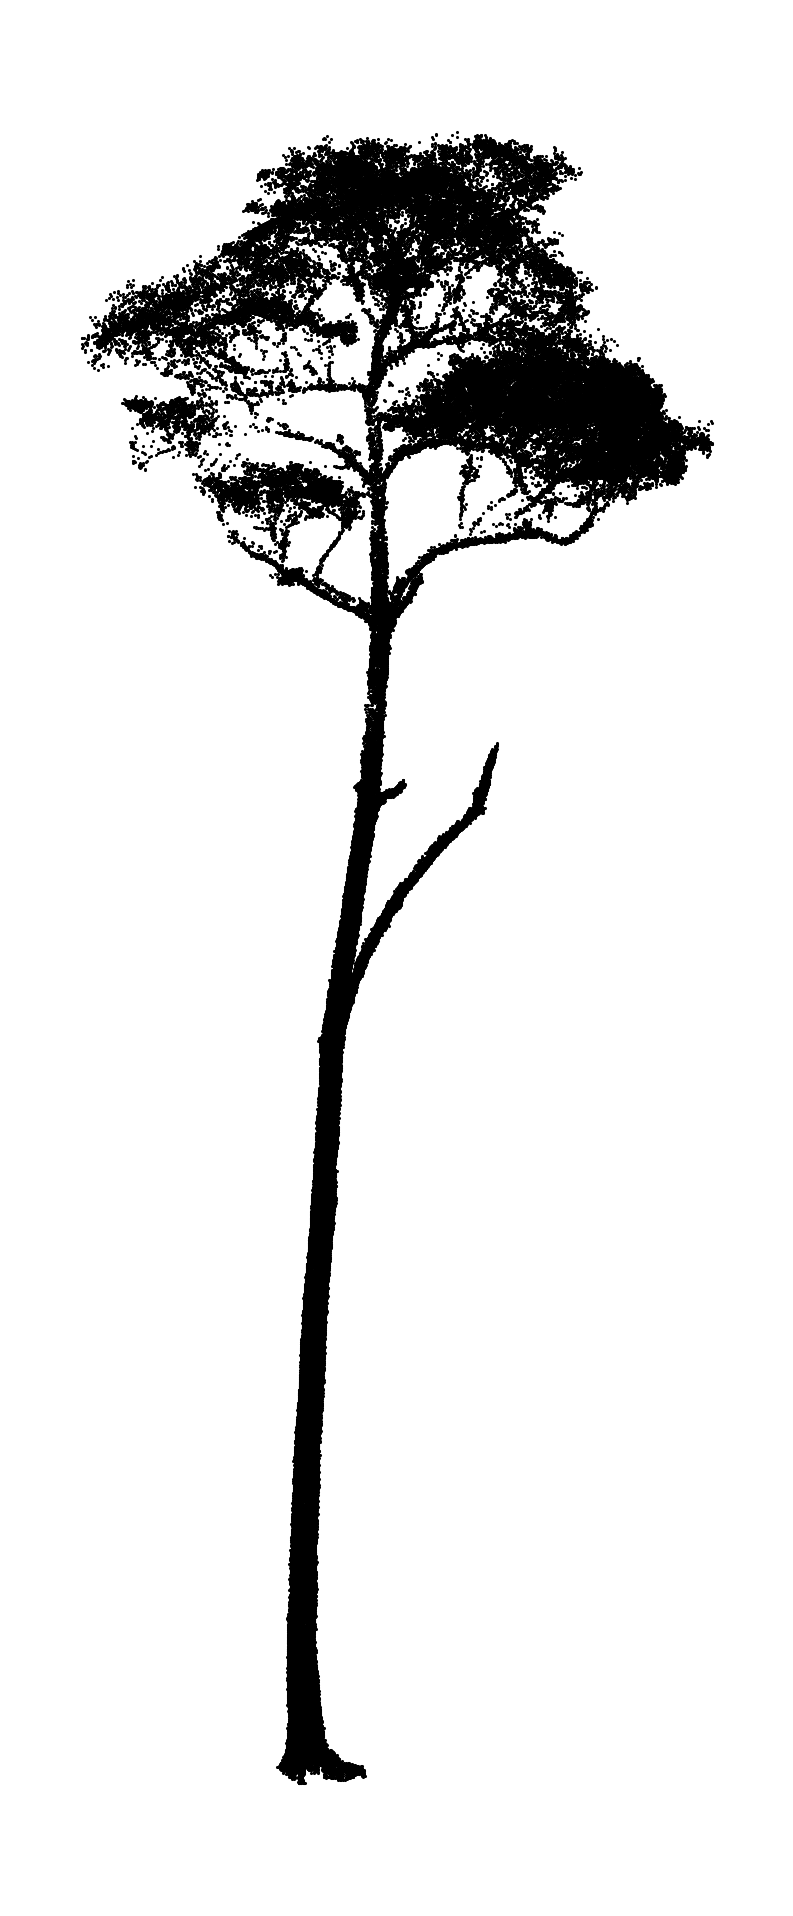

/tmp/ipykernel_8293/4170520186.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


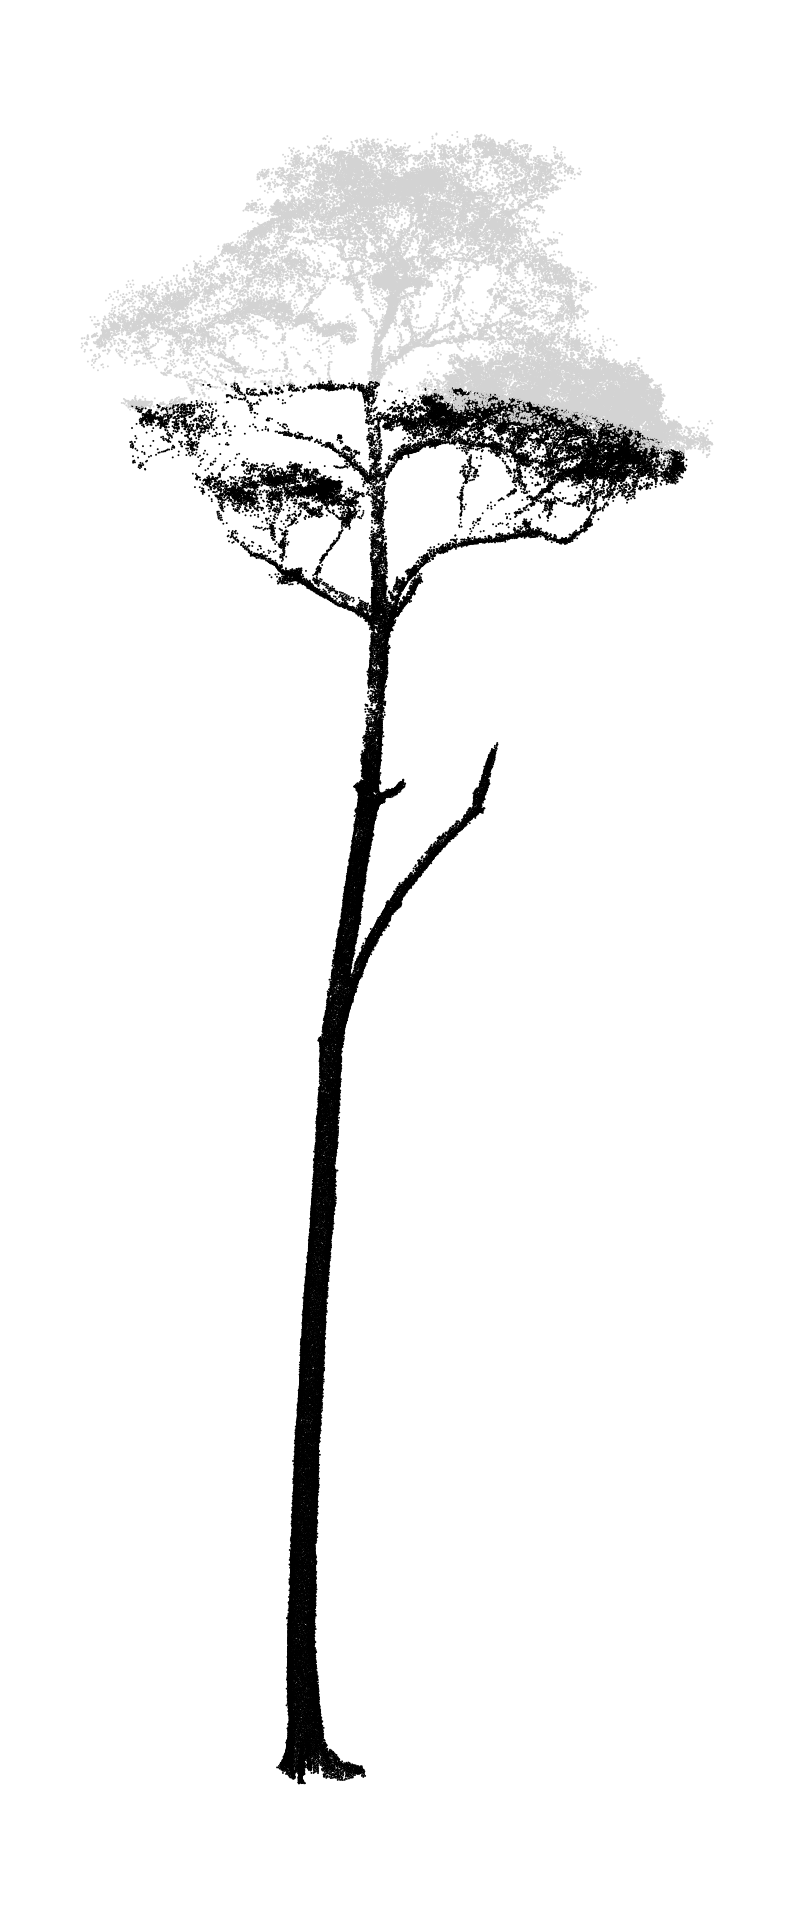

/tmp/ipykernel_8293/4170520186.py:91: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


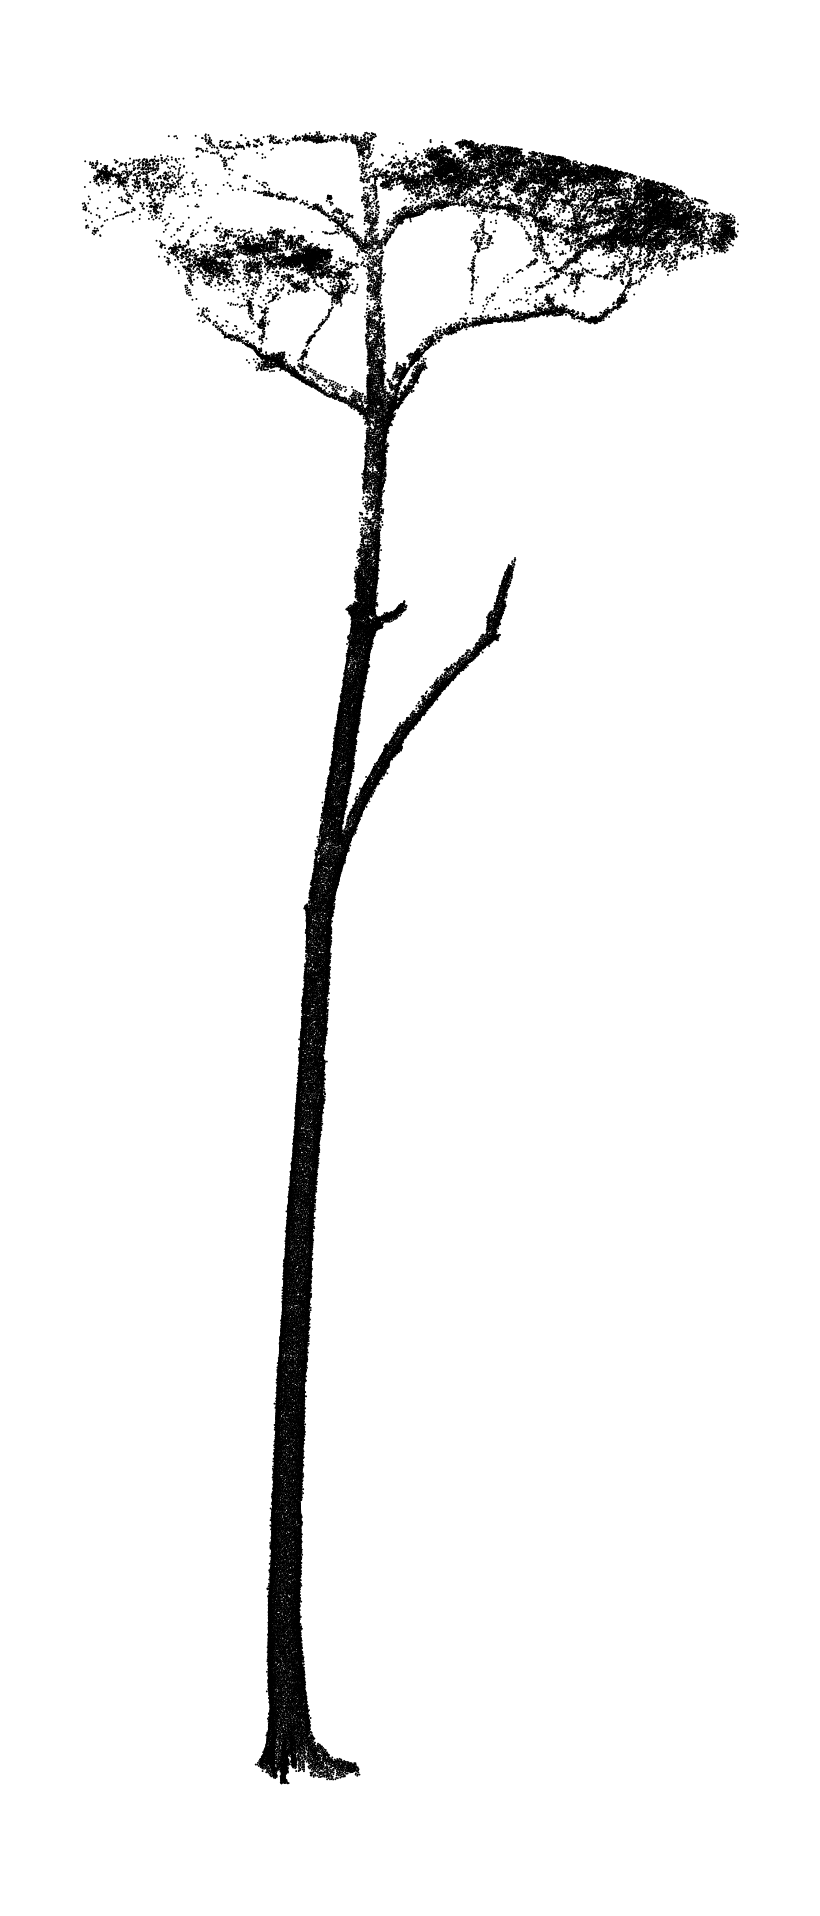

/tmp/ipykernel_8293/4170520186.py:138: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


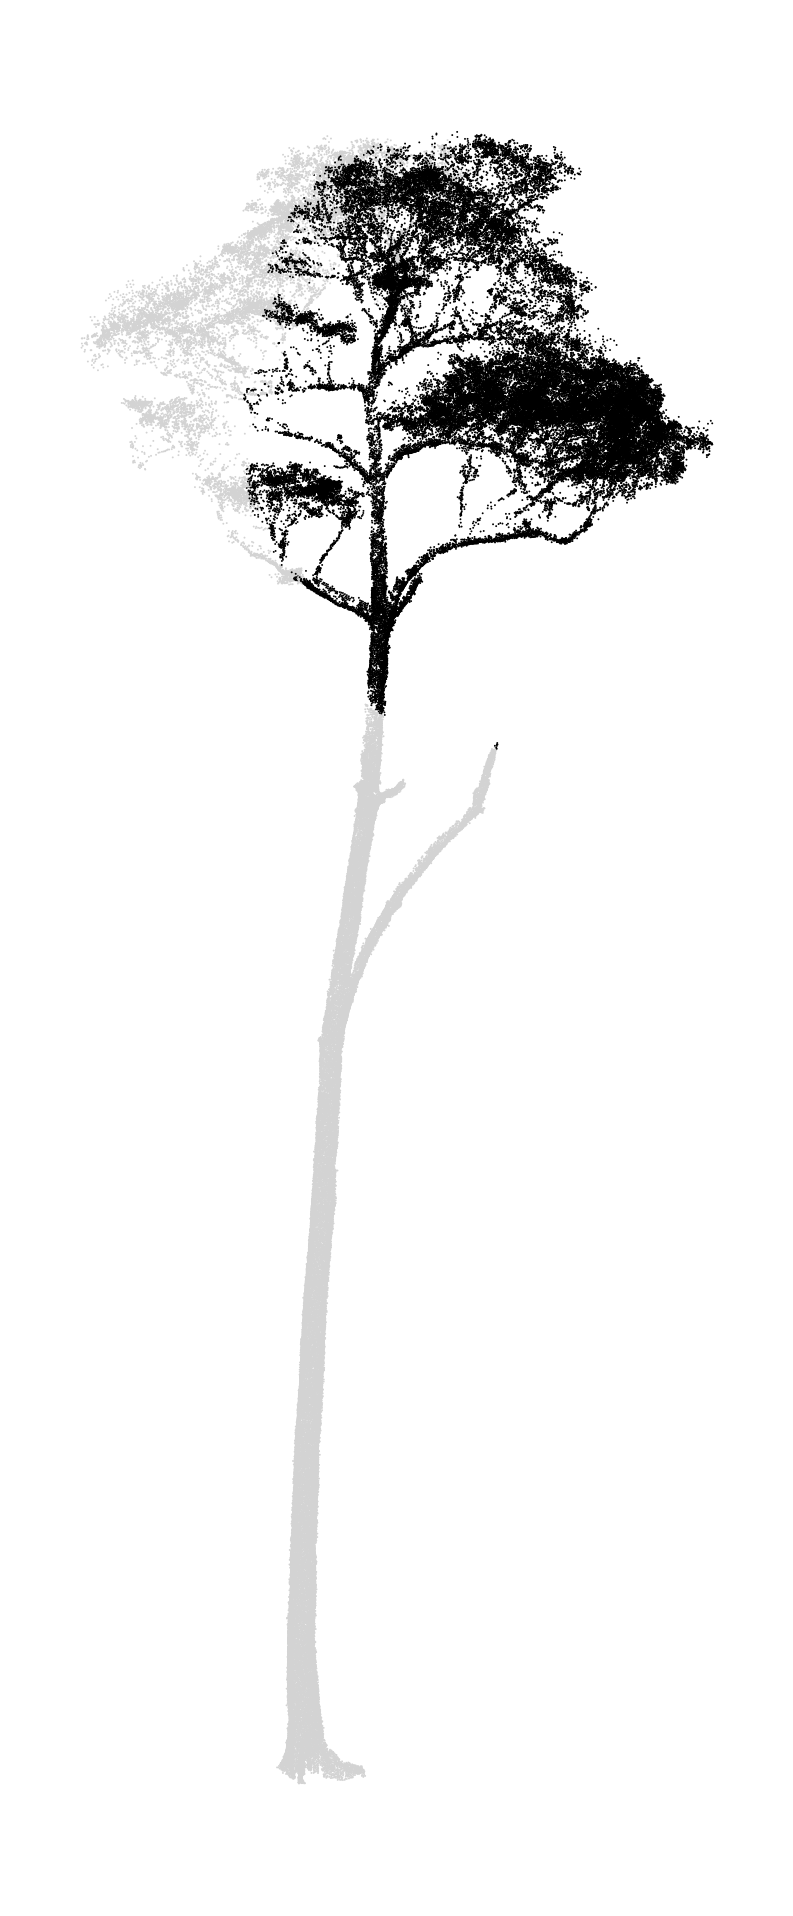

IndexError: index 9 is out of bounds for axis 1 with size 8

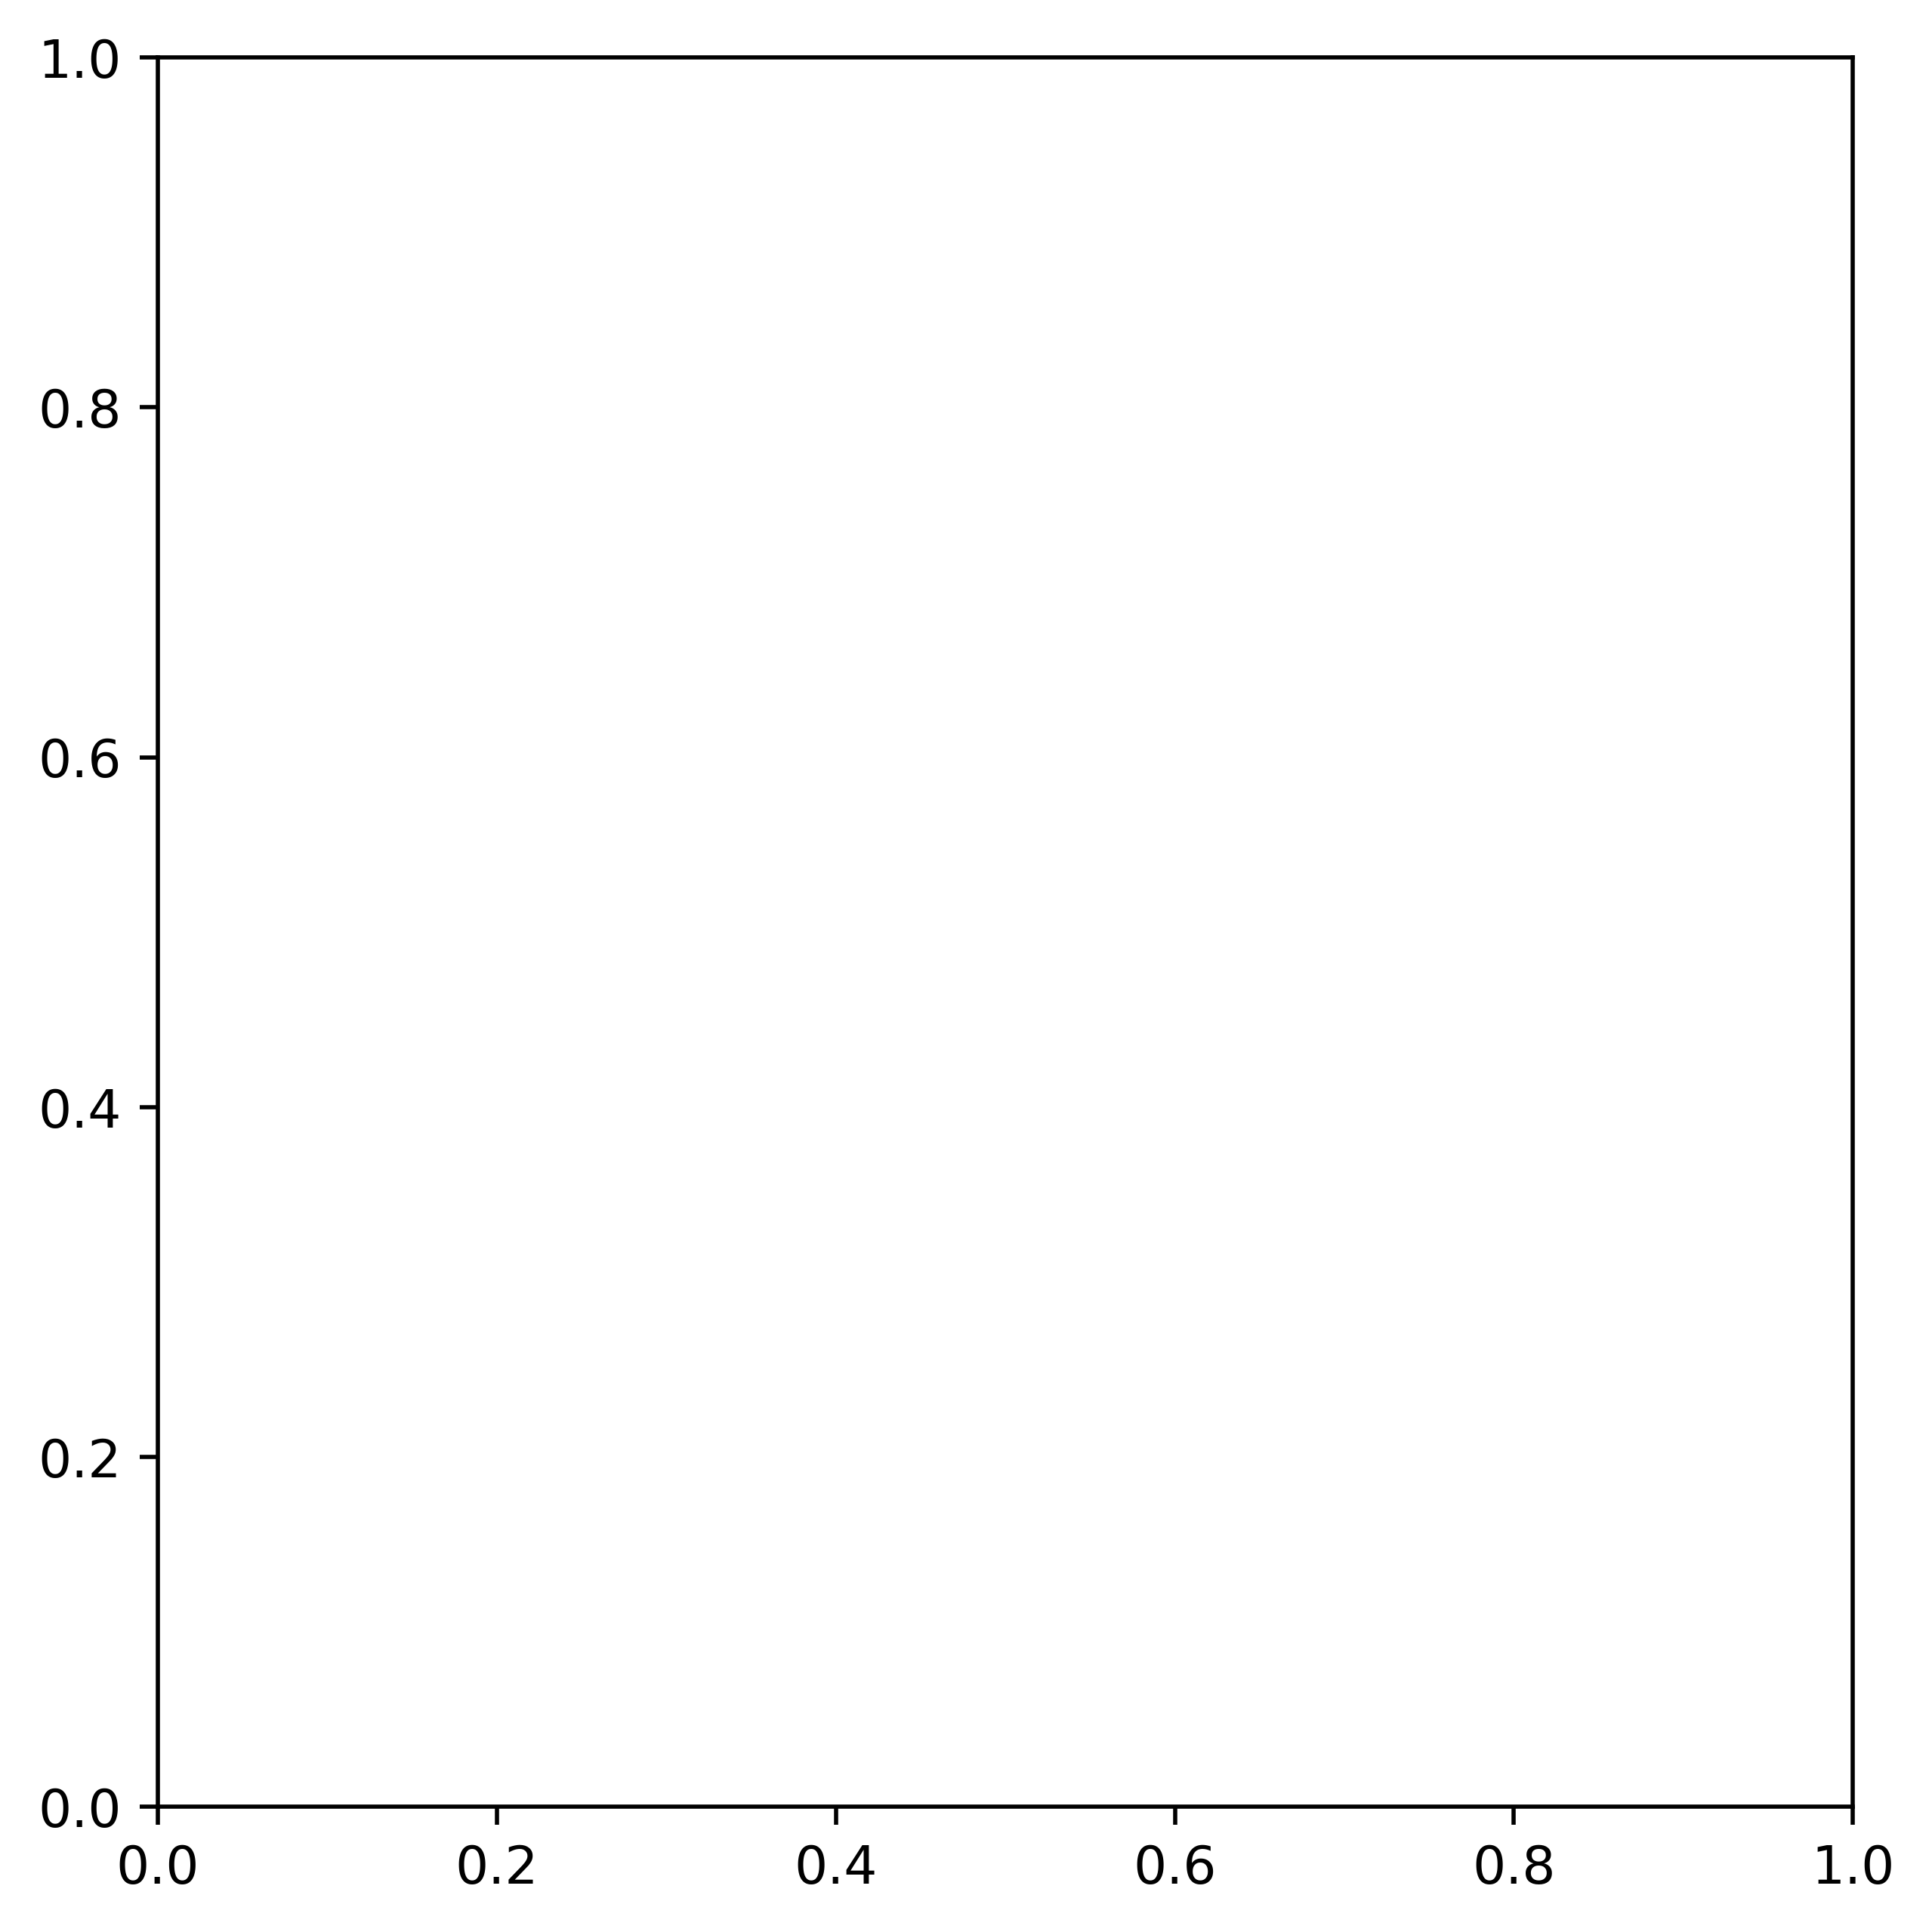

In [12]:
import numpy as np
import matplotlib.pyplot as plt

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example.txt'
pcl = np.loadtxt(path)


def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 0:
            cols.append('lightgrey')
        elif l == 1:
            cols.append('black')
    return cols

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
ax.scatter(pcl[:, 0], pcl[:, 2], color='black', s=0.8, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_og.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()

# Create a figure
# fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
# ax.scatter(pcl[:, 0], pcl[:, 2], color='black', s=0.3, marker='.', edgecolor=None, linewidth=0)
# ax.set_aspect(1)
# ax.yaxis.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.set_xticks([])
# path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_downsampled.png'
# fig.savefig(path_out, bbox_inches='tight', transparent=True)
# plt.tight_layout()   
# plt.show()

# Create a figure
# fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
# ax.scatter(pcl[:, 0], pcl[:, 2], c=pcl[:, 4], cmap='cividis', s=0.3, marker='.', edgecolor=None, linewidth=0)
# ax.set_aspect(1)
# ax.yaxis.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.set_xticks([])
# path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_distance.png'
# fig.savefig(path_out, bbox_inches='tight', transparent=True)
# plt.tight_layout()   
# plt.show()

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
cols = pltcolor(pcl[:, 5])
ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_selection.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
cols = pltcolor(pcl[pcl[:, 5] == 1, 5])
ax.scatter(pcl[pcl[:, 5] == 1, 0], pcl[pcl[:, 5] == 1, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_selection_cropped.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()

# Create a figure
# fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
# # cols = pltcolor(pcl[pcl[:, 5] == 1, 5])
# ax.scatter(pcl[pcl[:, 5] == 1, 0], pcl[pcl[:, 5] == 1, 2], c=pcl[pcl[:, 5] == 1, 3], cmap='Greys_r', s=0.3, marker='.', edgecolor=None, linewidth=0)
# ax.set_aspect(1)
# ax.yaxis.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.set_xticks([])
# path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_prediction_cropped.png'
# fig.savefig(path_out, bbox_inches='tight', transparent=True)
# plt.tight_layout()   
# plt.show()

# Create a figure
# fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
# ax.scatter(pcl[:, 0], pcl[:, 2], c=pcl[:, 6], cmap='Greys_r', s=0.3, marker='.', edgecolor=None, linewidth=0)
# ax.set_aspect(1)
# ax.yaxis.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.set_xticks([])
# path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_distance_2.png'
# fig.savefig(path_out, bbox_inches='tight', transparent=True)
# plt.tight_layout()   
# plt.show()

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
cols = pltcolor(pcl[:, 7])
ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_selection_2.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
cols = pltcolor(pcl[:, 9])
ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_selection_3.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 0:
            cols.append('#2ca02c')
        elif l == 1:
            cols.append('#5C4033')
    return cols

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
cols = pltcolor(pcl[:, 3])
ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_segmented.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=500, layout='compressed')
cols = pltcolor(pcl[:, 3])
ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.8, marker='.', edgecolor=None, linewidth=0)
ax.set_aspect(1)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
path_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/training_example_segmented_upsampled.png'
fig.savefig(path_out, bbox_inches='tight', transparent=True)
plt.tight_layout()   
plt.show()




In [15]:
pcl[:5, :]

array([[ -11.779, -221.442,  770.408,    1.   ,    0.946,    1.   ,
           0.946,    0.   ],
       [ -11.798, -221.436,  770.424,    1.   ,    0.946,    1.   ,
           0.946,    0.   ],
       [ -11.777, -221.446,  770.432,    1.   ,    0.946,    1.   ,
           0.946,    0.   ],
       [ -11.788, -221.41 ,  770.387,    1.   ,    0.946,    1.   ,
           0.946,    0.   ],
       [ -11.779, -221.422,  770.4  ,    1.   ,    0.946,    1.   ,
           0.946,    0.   ]])

## generalization potential

### Wytham woods + harverd forest

/tmp/ipykernel_6674/2720276934.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


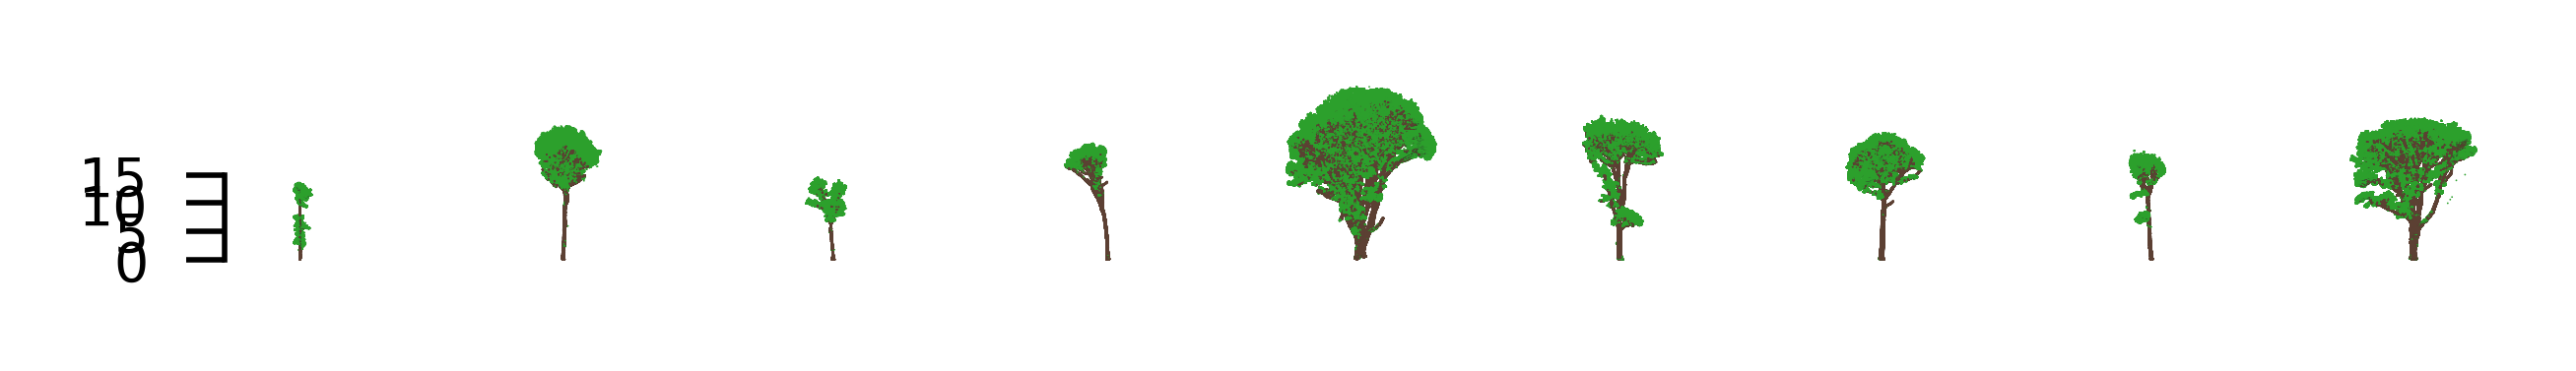

In [69]:
import numpy as np
import matplotlib.pyplot as plt

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leafon_individual_TLSdata/test_pred/'

filenames = [
    '305_T0_3_m_220a.txt',
    '301_T4_410.txt',
    '304_T1_354a.txt',
    '305_T0_712b.txt',

    '335_T0_446.txt',
    '308_T0_95.txt',
    '432_T2_70.txt',
    '436_T5_1496.txt',
    '386_T1_386.txt',
]

pcds = [np.loadtxt(path + filename) for filename in filenames]


def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 0:
            cols.append('#2ca02c')
        elif l == 1:
            cols.append('#5C4033')
    return cols

# Create a figure
fig, axs = plt.subplots(1, len(filenames), figsize=(4, 16), dpi=800, sharey=True, sharex=True, layout='compressed')

for i, pcl in enumerate(pcds):

    # Recenter and rebase
    pcl[:, 2] -= np.min(pcl[:, 2])
    pcl[:, 0] -= np.mean(pcl[:, 0])
    pcl[:, 1] -= np.mean(pcl[:, 1])

    # Get predictions as colors
    cols = pltcolor(pcl[:, 3])

    # Plot trees projected along x axis
    ax = axs[i]
    ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.1, marker='.', edgecolor=None, linewidth=0)

    # Set equal aspect ratio for x and y axis
    ax.set_aspect(1)

    # Remove all borders except the left y-axis for the very first subplot
    if i == 0:
        ax.yaxis.set_visible(True)
        ax.set_yticks(np.arange(0, 20, 5))
        ax.set_yticklabels(np.arange(0, 20, 5), fontsize=5)
        ax.tick_params(width=0.5)
        ax.spines['left'].set_bounds(0, 15)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    # Remove x-axis labels for all subplots
    ax.set_xticks([])


# Save figure
figname = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/generalization_other_trees.png'
fig.savefig(figname, bbox_inches='tight', transparent=True)

plt.tight_layout()   
plt.show()



/tmp/ipykernel_6674/3632355537.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


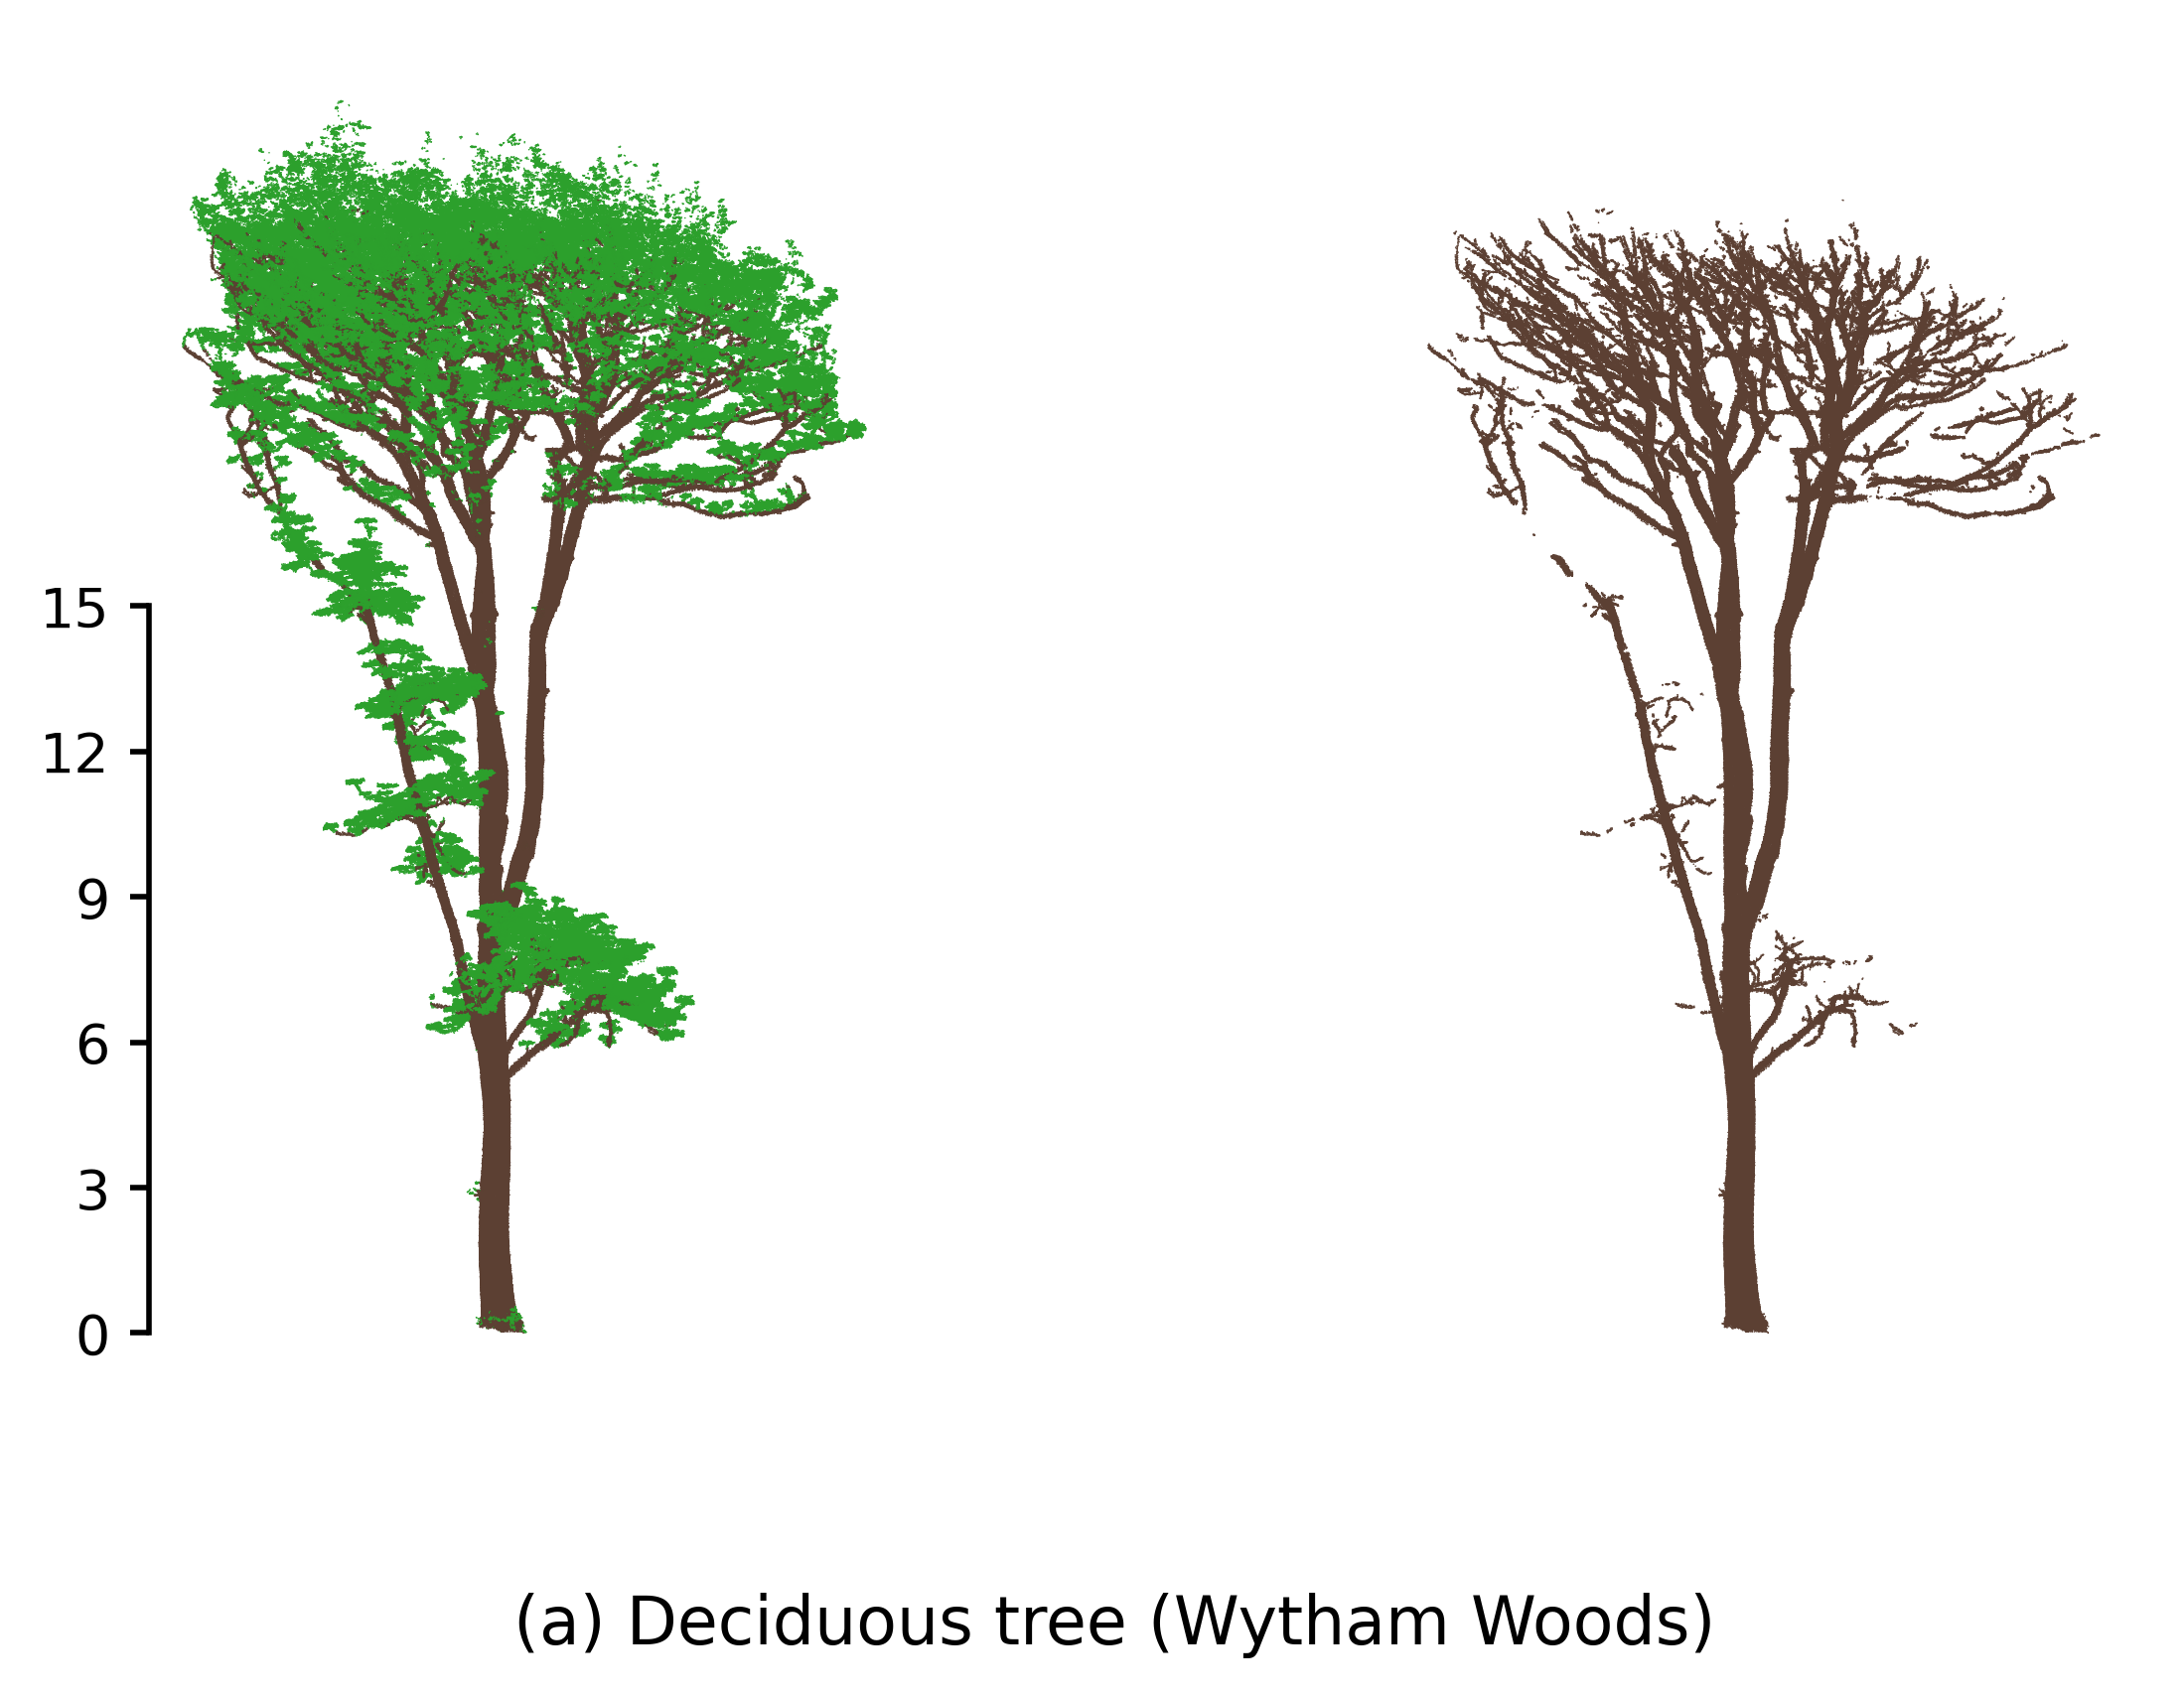

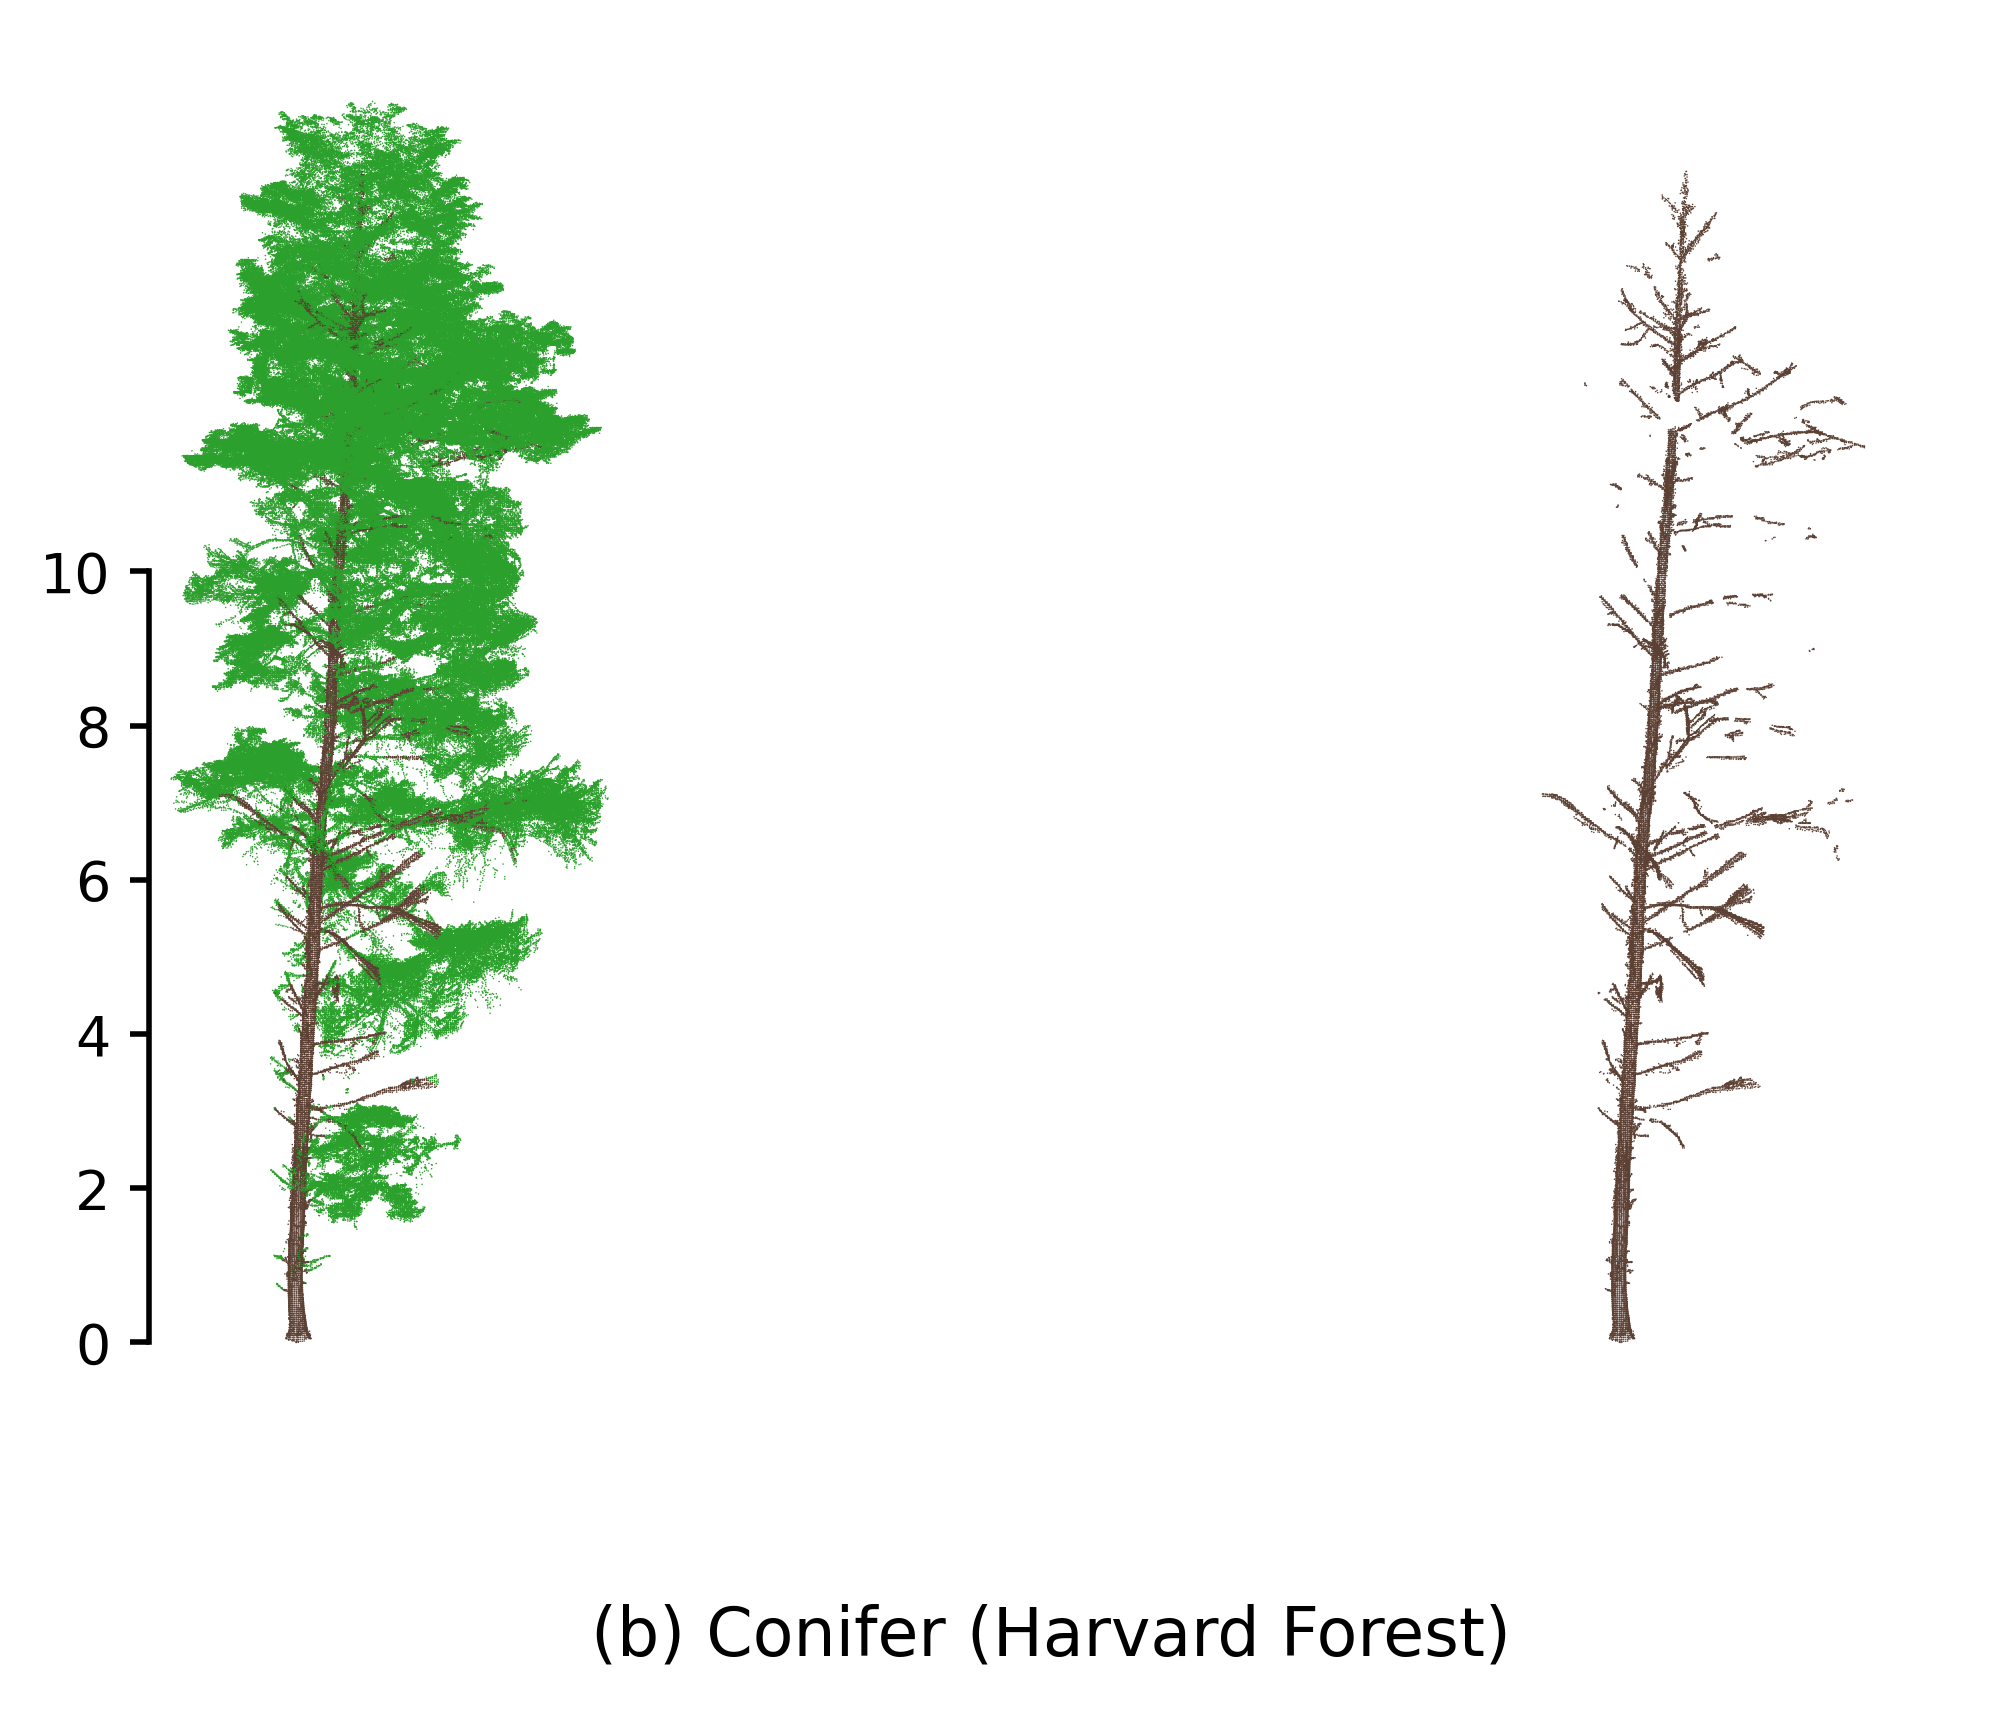

In [73]:
import numpy as np
import matplotlib.pyplot as plt

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leafwood_shilin/test_pred/'

filenames = [
    '308_T0_95.txt',
    'HFM_244.txt',
]

paths_out = [
    '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/generalization_wytham.png',
    '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/papers/leafwood/figures/generalization_harvard.png',
]

ticklist = [
    np.arange(0, 18, 3),
    np.arange(0, 12, 2),
]

xlabels = [
    '(a) Deciduous tree (Wytham Woods)',
    '(b) Conifer (Harvard Forest)',
]

pcds = [np.loadtxt(path + filename) for filename in filenames]


def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 0:
            cols.append('#2ca02c')
        elif l == 1:
            cols.append('#5C4033')
    return cols

pcl = pcds[0]

def plot_leafwood(pcl, ticks, xlabel, path_out):
    # Create a figure
    fig, axs = plt.subplots(1, 2, dpi=400, sharey=True, sharex=True, layout='compressed') # figsize=(5, 5)

    # Recenter and rebase
    pcl[:, 2] -= np.min(pcl[:, 2])
    pcl[:, 0] -= np.mean(pcl[:, 0])
    pcl[:, 1] -= np.mean(pcl[:, 1])

    # Get predictions as colors
    cols = pltcolor(pcl[:, 3])

    # Plot with leaves
    ax = axs[0]
    ax.scatter(pcl[:, 0], pcl[:, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
    ax.set_aspect(1)
    ax.yaxis.set_visible(True)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks, fontsize=10)
    ax.tick_params(width=1)
    ax.spines['left'].set_bounds(0, max(ticks))
    ax.spines['left'].set_linewidth(1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

    # Without leaves
    ax = axs[1]
    cols = pltcolor(pcl[pcl[:, 3] == 1, 3])
    ax.scatter(pcl[pcl[:, 3] == 1, 0], pcl[pcl[:, 3] == 1, 2], c=cols, s=0.3, marker='.', edgecolor=None, linewidth=0)
    ax.set_aspect(1)
    ax.yaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    fig.supxlabel(xlabel, fontsize=12)

    # Save figure
    fig.savefig(path_out, bbox_inches='tight', transparent=True)

    plt.tight_layout()   
    plt.show()


for pcl, ticks, xlabel, path_out in zip(pcds, ticklist, xlabels, paths_out):
    plot_leafwood(pcl, ticks, xlabel, path_out)


### forest patch

In [7]:
## Get class counts for synthetic forest patch

path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/leaf_wood/Tiles_npy/train/'

files = os.listdir(path)

c_leaf, c_wood, c_ground = 0, 0, 0
for file in files:
    pcl = np.load(os.path.join(path + file))
    c_leaf += (pcl[:, 3] == 0).sum()
    c_wood += (pcl[:, 3] == 1).sum()
    c_ground += (pcl[:, 3] == 2).sum()

print(c_leaf, c_wood, c_ground)


3680687 916610 5396044


In [7]:
## Code for processing CAX
import open3d as o3d

# Specify input and output path
file = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/cax2023/pointclouds/2023-10-07_cax_PA_0.025m.laz'
file_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/cax2023/pointclouds/2023-10-07_cax_PA_0.20m.ply'

# Read point cloud
pcl = o3d.t.io.read_point_cloud(file)

# Downsample
# down_sample_size = 0.2
# pcl_20 = pcl.voxel_down_sample(down_sample_size)

# Duplicate points as normals
# pcl.point.normals = pcl.point.positions

# # Make time stamp field (from zero to number of points in steps of 0.001)
# time = np.arange(0, len(pcl.point.positions.numpy()), 1).reshape(-1, 1) * 0.001
# pcl.point.time = o3d.core.Tensor(time, o3d.core.float32)

# # Write out point cloud
# o3d.t.io.write_point_cloud(file_out, pcl, write_ascii=False, compressed=True, print_progress=True)

[Open3D WARNING] Read geometry::PointCloud failed: unknown file extension for /mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/cax2023/pointclouds/2023-10-07_cax_PA_0.025m.laz (format: auto).


In [1]:
import laspy
import open3d as o3d
import numpy as np

pcl_path = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/cax2023/pointclouds/2023-10-07_cax_PA_0.025m.laz'

las = laspy.read(pcl_path)

print(list(las.point_format.dimension_names))

['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'red', 'green', 'blue', 'Reflectance', 'Deviation']


In [2]:


positions = np.vstack((las.X, las.Y, las.Z)).reshape(-1, 3)

array([[-2011134, -2011582, -1073691],
       [-1186749, -1858685, -1855641],
       [ -945707, -2005787, -2005072],
       ...,
       [-1077701,  -741898,  -743591],
       [ -951073,  -947378,  -949190],
       [ -958687,  -314782,  -315995]], dtype=int32)

In [6]:
device = o3d.core.Device("CPU:0")
dtype = o3d.core.float32

pcd = o3d.t.geometry.PointCloud(device)

# Array with x, y, z positions
positions = [[0, 0, 0], [1, 1, 1], [2, 2, 2]]
pcd.point.positions = o3d.core.Tensor(
    positions,
    dtype,
    device,
)

n_points = len(positions)

# Single scan position coordinates
scanpos = [[5, 5, 5]]
scanpos = np.repeat(scanpos, n_points, axis=0)
pcd.point.normals = o3d.core.Tensor(
    scanpos,
    dtype,
    device
)

# Random time
time = [[0]]
time = np.repeat(time, n_points, axis=0)
pcd.point.time = o3d.core.Tensor(
    time,
    dtype,
    device
)

filename = 'tests/pcl_with_pos_as_normal.ply'
o3d.t.io.write_point_cloud(
    filename, 
    pcd, 
    write_ascii=False, 
    compressed=False, 
    print_progress=False,
)


363483059

In [64]:
from scipy.io import loadmat, savemat
import numpy as np
import pandas as pd


def read_qsm_mat(path):
    # Read matlab .mat file
    file = loadmat(path)
    # Get QSM components
    cylinder = file['qsm'][0, 0][0][0]
    branch = file['qsm'][0, 0][1][0]
    treedata = file['qsm'][0, 0][2][0]
    rundata = file['qsm'][0, 0][3][0] 
    pmdistance = file['qsm'][0, 0][4][0] 
    return {
        'cylinder': {
            'start': cylinder['start'][0],
            'axis': cylinder['axis'][0],
            'length': cylinder['length'][0],
            'parent': cylinder['parent'][0],
            'branch': cylinder['branch'][0],
            'radius': cylinder['radius'][0],
        },
        'branch': branch,
        'treedata': treedata,
        'rundata': rundata,
        'pmdistance': pmdistance,
    }


def read_raycloud_treefile(path):
    ''' Function to read a treefile.txt (=QSM), which is the output from using raycloudtools 'rayextract forest pointcloud.ply' 
        Assumes a single tree on the third line of the txt file.

        Args:
            path (str): path to file

        Returns
            (pandas.DataFrame): dataframe with columns 'x', 'y', 'z', 'radius', 'parent_id', 'section_id'.
    '''
    # Read the file
    with open(path, 'r') as file:
        lines = file.readlines()

    # Extract the header and the data line
    headers = lines[1].strip().split(',')  # Second line contains the headers
    data_line = lines[2].strip()            # Third line contains all the data of a single tree

    # Split the data into rows using space as the delimiter
    rows = [row.rstrip(',') for row in data_line.split(' ')]

    # Split each row by commas to get individual values
    data = [list(map(float, row.split(','))) for row in rows]

    # Create the DataFrame
    return pd.DataFrame(data, columns=headers)

def treefile_to_treeqsm(path_in, path_out):
    ''' Function to convert qsm from raycloudtools (=treefile) TreeQSM style qsm.mat file
        Assumes a treefile with only one tree.

        Args:
            path_in: treefile.txt, output from raycloudtools
            path_out:  
    '''
    # Read treefile.txt
    df = read_raycloud_treefile(path_in)

    # Pre-allocate QSM
    n = df.shape[0] - 1
    qsm = {
        'start': np.zeros((n, 3), dtype=np.float32),
        'axis': np.zeros((n, 3), dtype=np.float32),
        'length': np.zeros((n, 1), dtype=np.float32),
        'radius': np.zeros((n, 1), dtype=np.float32),
        'parent': np.zeros((n, 1), dtype=np.int64), 
        'branch': np.zeros((n, 1), dtype=np.int64),
    }

    # Initialize branch number as 1
    branch = 1
    qsm['branch'][0] = branch

    # Loop over rows (=cylinders) in df
    for i in range(n):
        # Get cylinder end and start points
        current = df.values[i + 1]
        pid = int(current[4])
        parent = df.values[pid]

        # Calculate euclidean distance 
        length = np.sqrt(np.sum((current[0:3] - parent[0:3])**2))
        
        # Store cylinder values
        qsm['start'][i, :] = parent[0:3] # Start point of cylinder
        qsm['axis'][i, :] = (current[0:3] - parent[0:3]) / length # Normalized direction vector
        qsm['length'][i] = length # Length of cylinder
        qsm['radius'][i] = current[3] # Radius of cylinder
        qsm['parent'][i] = pid # parent ID

        # Branch number: branch number equals that of parent, unless subsequent cylinders have the same parent, then increase the branch number
        if current[4] - parent[4] == 0:
            # Two options: new branch number after every split (uncomment two lines below), or one main branch that keeps continuing with 'secondary' branches having a diffent number
            # branch += 1
            # qsm['branch'][i - 1] = branch
            branch += 1
            qsm['branch'][i] = branch
        else:
            row = int(current[4] - 1) if current[4] > 0 else 0 # row of the parent cylinder, set to 0 for first cylinder (otherwise row = -1)
            qsm['branch'][i] = qsm['branch'][row] # branch number of the parent

    # Format data into how it looks like when reading a qsm.mat file (see read_qsm_mat function)
    arr = np.array([[(qsm['start'], qsm['axis'], qsm['length'], qsm['radius'], qsm['parent'], qsm['branch'])]], dtype=[(key, 'O') for key in qsm.keys()])
    cyl = np.array([[(arr,)]], dtype=[('cylinder', 'O')])

    # Save arrays as matlab structure
    savemat(path_out, {'qsm': cyl})


# Filepaths
path_qsm_mat_example = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/software/foliage_genaration/foliage-generation-repo/src/example data/ExampleQSM.mat'
path_treefile = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/datasets/cax2023/pointclouds/PA/individual_trees/txt/2023-10-07_cax_PA_0.025m_clip_raycloud_trees_28.txt'
path_qsm_mat_out = '/mnt/c/Users/wavdnbro/OneDrive - UGent/Documents/spacetwin/software/foliage_genaration/foliage-generation-repo/src/example data/test_raycloud_QSM.mat'

# Convert treefile to TreeQSM.mat
treefile_to_treeqsm(path_treefile, path_qsm_mat_out)
    
# Note: branch id and parent id doesnt seem to matter